   # CODE FOR CENSUS PROJECT REPORT [CENSUS_10]
   ## Christian Somtoo Obiechina (202214049)
   #### All the codes for the cleaning, analysis and visualization of the census project are contained here.

In [1]:
pip install -U pandas-profiling[notebook]

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import all libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import missingno as mn

### DATA PREPARATION

#### Data Collection
This is a 2021 United Kingdom mock census data for the population of a moderately sized town sandwiched between two much larger cities that it is connected to by motorways.

In [3]:
#loading the dataset
df_census10 = pd.read_csv("census_10_2022MINE.csv")

In [4]:
df_census10

Unnamed: 0  House Number            Street First Name  Surname Age  \
0              0             1  Christmas Street      Kerry    Jones  34   
1              1             1  Christmas Street      Allan  Collins  36   
2              2             2  Christmas Street   Michelle   Davies  74   
3              3             2  Christmas Street   Jonathan   Davies  41   
4              4             2  Christmas Street      Paige   Davies  39   
...          ...           ...               ...        ...      ...  ..   
7255        7255             1      Monk Rectory    Marilyn  Wallace  40   
7256        7256             1      Monk Rectory     Edward  Wallace  37   
7257        7257             1      Monk Rectory       Jack  Wallace  16   
7258        7258             1      Monk Rectory      Kevin  Wallace  14   
7259        7259             1      Monk Rectory     Claire  Wallace  14   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
2                             Head        Widowed  Female   
3                              Son       Divorced    Male   
4                         Daughter        Widowed  Female   
...                            ...            ...     ...   
7255                          Head        Married  Female   
7256                       Husband        Married    Male   
7257                           Son            NaN    Male   
7258                           Son            NaN    Male   
7259                      Daughter            NaN  Female   

                                    Occupation Infirmity   Religion  
0                          Mechanical engineer      None       None  
1                                Ranger/warden      None       None  
2                           Retired Oncologist      None  Christian  
3                            Ceramics designer      None  Christian  
4                                   Unemployed      None  Christian  
...                                        ...       ...        ...  
7255                     Clinical psychologist      None       None  
7256  Geographical information systems officer      None       None  
7257                                   Student      None        NaN  
7258                                   Student      None        NaN  
7259                                   Student      None        NaN  

[7260 rows x 12 columns]

<AxesSubplot: >

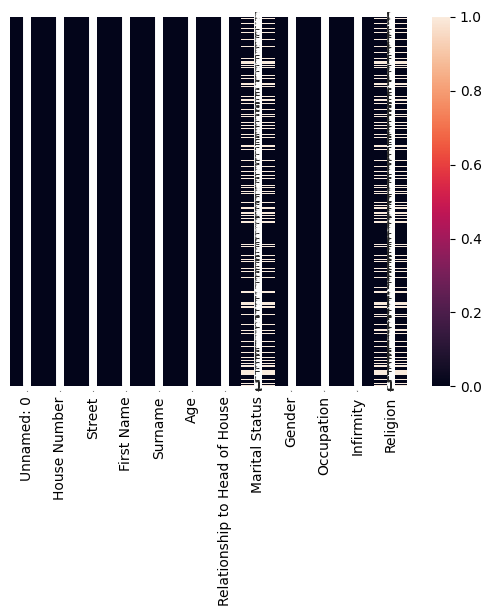

In [5]:
sns.heatmap(df_census10.isnull(), yticklabels = False, annot = True)

 This sample map helps for easier understanding providing insights to components' interactions. Religion and marital status had the most missing values as shown. 

In [6]:
#Let us have a quick analysis of our raw data before cleaning
pp.ProfileReport(df_census10)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df_census10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     7260 non-null   int64 
 1   House Number                   7260 non-null   int64 
 2   Street                         7260 non-null   object
 3   First Name                     7260 non-null   object
 4   Surname                        7260 non-null   object
 5   Age                            7260 non-null   object
 6   Relationship to Head of House  7260 non-null   object
 7   Marital Status                 5628 non-null   object
 8   Gender                         7260 non-null   object
 9   Occupation                     7260 non-null   object
 10  Infirmity                      7260 non-null   object
 11  Religion                       5596 non-null   object
dtypes: int64(2), object(10)
memory usage: 680.8+ KB


Information shows a total of 12 variables with 2 numeric and 10 categorical variables respectively with a missing cells of 3296 in a population of 7260.

### Data Cleaning

#### As part of data preparation, cleaning should be done to correct the data errors, solve inconsistencies, anomalies, incomplete and missing records where required.

In [8]:
#Dropping the Unnamed: 0 column since it has no significant input to our work.
df_census10 = df_census10.drop('Unnamed: 0', axis = 1)
df_census10

House Number            Street First Name  Surname Age  \
0                1  Christmas Street      Kerry    Jones  34   
1                1  Christmas Street      Allan  Collins  36   
2                2  Christmas Street   Michelle   Davies  74   
3                2  Christmas Street   Jonathan   Davies  41   
4                2  Christmas Street      Paige   Davies  39   
...            ...               ...        ...      ...  ..   
7255             1      Monk Rectory    Marilyn  Wallace  40   
7256             1      Monk Rectory     Edward  Wallace  37   
7257             1      Monk Rectory       Jack  Wallace  16   
7258             1      Monk Rectory      Kevin  Wallace  14   
7259             1      Monk Rectory     Claire  Wallace  14   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
2                             Head        Widowed  Female   
3                              Son       Divorced    Male   
4                         Daughter        Widowed  Female   
...                            ...            ...     ...   
7255                          Head        Married  Female   
7256                       Husband        Married    Male   
7257                           Son            NaN    Male   
7258                           Son            NaN    Male   
7259                      Daughter            NaN  Female   

                                    Occupation Infirmity   Religion  
0                          Mechanical engineer      None       None  
1                                Ranger/warden      None       None  
2                           Retired Oncologist      None  Christian  
3                            Ceramics designer      None  Christian  
4                                   Unemployed      None  Christian  
...                                        ...       ...        ...  
7255                     Clinical psychologist      None       None  
7256  Geographical information systems officer      None       None  
7257                                   Student      None        NaN  
7258                                   Student      None        NaN  
7259                                   Student      None        NaN  

[7260 rows x 11 columns]

In [9]:
df_census10.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [10]:
#rundown of a brief description of our dataset
df_census10.describe(include = 'all')

House Number             Street First Name Surname   Age  \
count    7260.000000               7260       7260    7260  7260   
unique           NaN                105        365     638   118   
top              NaN  Atkinson Motorway     Duncan   Smith    40   
freq             NaN                490         39     207   136   
mean       30.707989                NaN        NaN     NaN   NaN   
std        39.423265                NaN        NaN     NaN   NaN   
min         1.000000                NaN        NaN     NaN   NaN   
25%         7.000000                NaN        NaN     NaN   NaN   
50%        17.000000                NaN        NaN     NaN   NaN   
75%        34.000000                NaN        NaN     NaN   NaN   
max       221.000000                NaN        NaN     NaN   NaN   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           7260           5628    7260       7260   
unique                            22              9       8       1073   
top                             Head         Single  Female    Student   
freq                            2821           2431    3756       1310   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity Religion  
count       7260     5596  
unique         8       12  
top         None     None  
freq        7206     2514  
mean         NaN      NaN  
std          NaN      NaN  
min          NaN      NaN  
25%          NaN      NaN  
50%          NaN      NaN  
75%          NaN      NaN  
max          NaN      NaN

### Checking for missing values and inconsistencies across the entire dataset and making corrections sequentially.
##### From profiling report and isnull command, it could be observed that there are many missing values across Marital status and Religion. For comprehensive data preparation, we need to check each column sequentially to identify and correct missing values.

In [11]:
df_census10.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1632
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1664
dtype: int64

HOUSE NUMBER : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute.

In [12]:
df_census10['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
df_census10.loc[df_census10['House Number'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

*House Number is free from errors; ready for analysis.

STREET : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute.

In [14]:
df_census10['Street'].unique()

array(['Christmas Street', 'Mistry Avenue', 'Kelly Dam', 'Truro Lane',
       'Davies Street', 'Railway Avenue', 'Duchess Street',
       'October Island', 'Jones Drive', 'Shrine Avenue', 'Macerush Road',
       'Telegraph Lane', 'Ripon Lane', 'Bathhouse Views', 'Evans Street',
       'Bell Drive', 'Wong Haven', 'Hedgehog Street', 'Ali Gardens',
       'Clarke Meadows', 'Lucas Underpass', 'Read Drive', 'Rhubarb Drive',
       'Leeds Lane', 'Shaw Loop', 'Bailey Street', 'Oxfordbox Avenue',
       'Zebra Street', 'Johnson Cliff', 'Stone Street',
       'Brightwater Lane', 'Hart Road', 'Lowlandadd Street', 'Price Dam',
       'Richardson Light', 'Oakportal Street', 'Andrews Junction',
       'Horse Drive', 'McCarthy Lane', 'Roberts Road', 'Ashwalk Street',
       'Berry Avenue', 'Smith Summit', 'Temple River', 'Edwards Overpass',
       'Oyster Crescent', 'Severnvane Lane', 'Coconut Lane',
       'Tyler Brook', 'Landings Avenue', 'Haynes Course', 'Wilson Falls',
       'Payne Avenue', 'Wi

In [15]:
df_census10.loc[df_census10['Street'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [16]:
#checking for dupliactes in the street
df_census10['Street'].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
7255    False
7256     True
7257     True
7258     True
7259     True
Name: Street, Length: 7260, dtype: bool

In [17]:
df_census10['Street'].duplicated().sum()

7155

*The Street is ready for analysis with 7155 duplicates as shown above.

FIRST NAME : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute.

In [18]:
df_census10['First Name'].unique()

array(['Kerry', 'Allan', 'Michelle', 'Jonathan', 'Paige', 'Patrick',
       'Kelly', 'Gerald', 'Barbara', 'Heather', 'Francis', 'Linda',
       'William', 'Ann', 'Terence', 'Leonard', 'Clare', 'Danny',
       'Alexandra', 'Jason', 'Kim', 'Frank', 'Stephanie', 'Christian',
       'Alison', 'Abigail', 'Marion', 'Henry', 'Natasha', 'June',
       'Ronald', 'Samantha', 'Kathleen', 'Gillian', 'Leigh', 'Mark',
       'Harry', 'Beth', 'Gareth', 'Melanie', 'Nicola', 'Debra', 'Diana',
       'Lynda', 'Pauline', 'Carl', 'Lynne', 'Ian', 'Hannah', 'Helen',
       'John', 'Rachel', 'Adam', 'Ashley', 'Hayley', 'Richard', 'Tina',
       'Carly', 'Jean', 'Josephine', 'Diane', 'Brandon', 'Sally', 'Reece',
       'Margaret', 'Darren', 'Dawn', 'Joanne', 'Bryan', 'Gavin', 'Jeremy',
       'Hollie', 'Joanna', 'Jenna', 'Cameron', 'Lucy', 'Declan', 'George',
       'Alice', 'Craig', 'Amanda', 'Jodie', 'Susan', 'Leah', 'Vanessa',
       'Kimberley', 'Daniel', 'Claire', 'Clifford', 'Nicholas', 'Frances',
     

In [19]:
df_census10.loc[df_census10['First Name'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [20]:
df_census10['First Name'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7255     True
7256     True
7257     True
7258     True
7259     True
Name: First Name, Length: 7260, dtype: bool

In [21]:
df_census10['First Name'].duplicated().sum()

6895

*First Name is ready for analysis with 6895 duplicates as shown above.

SURNAME : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute.

In [22]:
df_census10['Surname'].unique()

array(['Jones', 'Collins', 'Davies', 'Hughes', 'Rowe', 'Williams',
       'Lewis', 'Walker', 'Hawkins', 'Roberts', 'Harrison', 'Hilton',
       'Hilton-Coleman', 'White', 'Hopkins-White', 'Mason', 'Bell',
       'Naylor', 'Poole', 'Newman', 'French', 'Marsh', 'Begum', 'Stewart',
       'Humphreys', 'Daniels', 'Smith', 'Saunders', 'Iqbal', 'Webster',
       'Godfrey', 'Mitchell', 'Clayton', 'Taylor', 'Hall',
       'Wright-Edwards', 'Booth', 'Osborne', 'Thomas', 'Morris',
       'Shepherd', 'Butler', 'Lamb-Jones', 'Howarth', 'Wilson', 'Shaw',
       'Thomson', 'Hall-Thomson', 'Morgan', 'Brown', 'Banks', 'Dawson',
       'Ellis', 'Jackson', 'Stephens', 'King', 'Wood', 'Harris',
       'Edwards', 'Sinclair', 'Hope', 'Griffin', 'Dyer', 'Forster',
       'Stephenson', 'Tomlinson', 'Gibbons', 'Hill', 'Harris-Hill',
       'Hunt', 'Francis', 'Miller', 'Mills', 'Thompson', 'Johnson', 'Lee',
       'Summers', 'Bull', 'Cole', 'Matthews', 'Browne', 'Houghton',
       'Green', 'Wilkinson', 'Spence

In [23]:
df_census10.loc[df_census10['Surname'] == ' ']

House Number        Street First Name Surname Age  \
5082            13  Iris Landing      Garry          43   

     Relationship to Head of House Marital Status Gender  \
5082                        Lodger         Single   Male   

                    Occupation Infirmity   Religion  
5082  Surveyor, land/geomatics      None  Christian

In [24]:
#Let us check for missing surname in the household
df_census10.loc[(df_census10['House Number'] == 13) & (df_census10['Street'] == 'Iris Landing')]

House Number        Street First Name    Surname Age  \
5081            13  Iris Landing       Anne  Alexander  34   
5082            13  Iris Landing      Garry             43   
5083            13  Iris Landing      Grace   Chambers  51   

     Relationship to Head of House Marital Status  Gender  \
5081                          Head       Divorced  Female   
5082                        Lodger         Single    Male   
5083                       Sibling       Divorced  Female   

                    Occupation Infirmity   Religion  
5081                      Make      None  Christian  
5082  Surveyor, land/geomatics      None  Christian  
5083                 Mudlogger      None       None

In [25]:
#Since there was no relative,replace it with unknown.
df_census10['Surname']= df_census10['Surname'].replace(' ', 'Unknown')

In [26]:
#confirming the replaced missing value
df_census10.loc[df_census10['Surname'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [27]:
df_census10['Surname'].duplicated()

0       False
1       False
2       False
3        True
4        True
        ...  
7255     True
7256     True
7257     True
7258     True
7259     True
Name: Surname, Length: 7260, dtype: bool

In [28]:
df_census10['Surname'].duplicated().sum()

6622

*Surname is ready for analysis with 6622 duplicates as shown above. An unidentified surname for a lodger (Garry) was replaced with unknown since there was relative found within the household. 

AGE : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [29]:
df_census10['Age'].unique()

array(['34', '36', '74', '41', '39', '35', '29', '66', '64', '72', '9',
       '38', '7', '6', '5', '75', '15', '67', '0', '59', '14', '32', '37',
       '4', '1', '28', '31', '47', '42', '73', '44', '43', '30', '2',
       '46', '50', '24', '20', '17', '70', '48', '21', '56', '10', '12',
       '33', '63', '79', '81', '19', '18', '49', '22', '86', '83', '55',
       '69', '82', '40', '3', '11', '57', '61', '23', '8', '77', '80',
       '25', '71', '84', '68', '52', '27', '62', '78', '65', '26', '53',
       '60', '54', '58', '76', '88', '91', '51', '45', '16', '105', '13',
       '90', '89', '92', '85', '67.99876364', '70.99876364', '87', '99',
       '100', '101', '71.11459116', '58.33545959', '80.42115361',
       '88.42115361', '107', '102', '94', '93', '104', '97', '95', '96',
       ' ', '54.83603273', '78.62792347', '110', 'four', 'three', 'one'],
      dtype=object)

In [30]:
df_census10.loc[df_census10['Age'] == ' ']

House Number         Street First Name Surname Age  \
4866             7  Holmes Points   Mitchell   Smith       

     Relationship to Head of House Marital Status Gender  \
4866                        Lodger       Divorced   Male   

                  Occupation Infirmity   Religion  
4866  Sales professional, IT      None  Methodist

In [31]:
df_census10['Age'] = df_census10['Age'].replace('four', '4')
df_census10['Age'] = df_census10['Age'].replace('three', '3')
df_census10['Age'] = df_census10['Age'].replace('one', '1')
df_census10['Age'] = df_census10['Age'].replace(' ', np.nan)

In [32]:
#calculate the common denominator across the age column to replace the missing age
df_census10['Age'].median()

37.0

In [33]:
df_census10['Age'] = df_census10['Age'].replace(np.nan, '37.0')

In [34]:
df_census10['Age'] = df_census10['Age'].astype(float)


In [35]:
df_census10['Age'] = df_census10['Age'].astype(int)

In [36]:
df_census10['Age'].unique()

array([ 34,  36,  74,  41,  39,  35,  29,  66,  64,  72,   9,  38,   7,
         6,   5,  75,  15,  67,   0,  59,  14,  32,  37,   4,   1,  28,
        31,  47,  42,  73,  44,  43,  30,   2,  46,  50,  24,  20,  17,
        70,  48,  21,  56,  10,  12,  33,  63,  79,  81,  19,  18,  49,
        22,  86,  83,  55,  69,  82,  40,   3,  11,  57,  61,  23,   8,
        77,  80,  25,  71,  84,  68,  52,  27,  62,  78,  65,  26,  53,
        60,  54,  58,  76,  88,  91,  51,  45,  16, 105,  13,  90,  89,
        92,  85,  87,  99, 100, 101, 107, 102,  94,  93, 104,  97,  95,
        96, 110])

AGE is ready for analysis. A missing age was identified for Mitchell Smith which was replaced with a common denominator of median(37), strings of Lettered figures, integers & floats were identified. Conversion to list of integers was done. 

RELATIONSHIP TO HEAD OF HOUSE : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [37]:
#checking for missing values in Relationship to Head of House
df_census10['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Daughter', 'Wife', 'Lodger', 'Partner',
       'None', 'Grandson', 'Step-Daughter', 'Granddaughter', 'Step-Son',
       'Nephew', 'Neice', 'Sibling', 'Adopted Daughter', 'Adopted Son',
       'Cousin', 'Visitor', 'Son-in-law', 'Adopted Grandson', ' '],
      dtype=object)

In [38]:
df_census10.loc[df_census10['Relationship to Head of House'] == ' ']

House Number        Street First Name Surname  Age  \
6872            31  Jackson Lane     Elliot   Watts   27   

     Relationship to Head of House Marital Status Gender     Occupation  \
6872                                       Single   Male  Oceanographer   

     Infirmity Religion  
6872      None     None

In [39]:
df_census10.loc[(df_census10['House Number'] == 31) & (df_census10['Street'] == 'Jackson Lane')]

House Number        Street   First Name  Surname  Age  \
6864            31  Jackson Lane        Diana  Hayward   38   
6865            31  Jackson Lane        Keith  Hayward   40   
6866            31  Jackson Lane         June  Hayward   12   
6867            31  Jackson Lane        Mandy  Hayward    9   
6868            31  Jackson Lane     Victoria  Hayward    6   
6869            31  Jackson Lane      Phillip  Hayward    5   
6870            31  Jackson Lane  Christopher  Hayward    3   
6871            31  Jackson Lane       Sylvia    Moore   61   
6872            31  Jackson Lane       Elliot    Watts   27   
6873            31  Jackson Lane        Robin    Smith   58   

     Relationship to Head of House Marital Status  Gender  \
6864                          Head        Married  Female   
6865                       Husband        Married    Male   
6866                      Daughter            NaN  Female   
6867                      Daughter            NaN  Female   
6868                      Daughter            NaN  Female   
6869                           Son            NaN    Male   
6870                           Son            NaN    Male   
6871                       Sibling         Single  Female   
6872                                       Single    Male   
6873                        Lodger         Single    Male   

                     Occupation Infirmity   Religion  
6864  Estate manager/land agent      None       None  
6865                     Artist      None       None  
6866                    Student      None        NaN  
6867                    Student      None        NaN  
6868                    Student      None        NaN  
6869                    Student      None        NaN  
6870                      Child      None        NaN  
6871      Glass blower/designer      None  Christian  
6872              Oceanographer      None       None  
6873            Patent attorney      None  Methodist

In [40]:
#checking through the household we discovered that he is not related to anyone thus he could be categorised as none because there is no detailed information about him.
df_census10['Relationship to Head of House'] = df_census10['Relationship to Head of House'].replace(' ', 'None')

In [41]:
df_census10['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Daughter', 'Wife', 'Lodger', 'Partner',
       'None', 'Grandson', 'Step-Daughter', 'Granddaughter', 'Step-Son',
       'Nephew', 'Neice', 'Sibling', 'Adopted Daughter', 'Adopted Son',
       'Cousin', 'Visitor', 'Son-in-law', 'Adopted Grandson'],
      dtype=object)

In [42]:
#checking relationship to head of house with no identity 'None'.
RelatHoH_df_None = df_census10.loc[df_census10['Relationship to Head of House'] == 'None']

In [43]:
RelatHoH_df_None.groupby('Age')['Relationship to Head of House'].describe()

count unique   top freq
Age                        
8       1      1  None    1
14      1      1  None    1
18     15      1  None   15
19     16      1  None   16
20     15      1  None   15
21     17      1  None   17
22     15      1  None   15
23      9      1  None    9
24      6      1  None    6
25      5      1  None    5
26     10      1  None   10
27     11      1  None   11
28     16      1  None   16
29      8      1  None    8
30      6      1  None    6
31      4      1  None    4
32      6      1  None    6
33      3      1  None    3
34      6      1  None    6
35      9      1  None    9
36      6      1  None    6
37      9      1  None    9
38     10      1  None   10
39      6      1  None    6
40     12      1  None   12
41      6      1  None    6
42      7      1  None    7
43     12      1  None   12
44      7      1  None    7
45     10      1  None   10
46      7      1  None    7
47      5      1  None    5
48      8      1  None    8
49     10      1  None   10
50     10      1  None   10
51      8      1  None    8
52      8      1  None    8
53      5      1  None    5
54      2      1  None    2
55      7      1  None    7
56     12      1  None   12
57      6      1  None    6
58      5      1  None    5
59      1      1  None    1
60      9      1  None    9
61      7      1  None    7
62      7      1  None    7
63      8      1  None    8
64      6      1  None    6

In [44]:
#considering the fact that the head of the house must Head and must be 18 years and above. Let's check if there are unqualified head of house.
df_census10.loc[(df_census10['Age'] < 18) & (df_census10['Relationship to Head of House'] == 'Head')]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

Relationship to head of house is ready for analysis. All the heads of house are 18 years and above according to UK laws as demonstrated above.

MARITAL STATUS : Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [45]:
df_census10['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single', nan, 'S', 'W', ' ',
       'D', 'M'], dtype=object)

In [46]:
df_census10.loc[df_census10['Marital Status'] == ' ']

House Number      Street First Name Surname  Age  \
1638            19  Leeds Lane      Molly   Davis   14   

     Relationship to Head of House Marital Status  Gender Occupation  \
1638                      Daughter                 Female    Student   

     Infirmity Religion  
1638      None      NaN

In [47]:
df_census10['Marital Status'].value_counts()

Single      2431
Married     2135
Divorced     672
Widowed      367
S              8
M              7
D              4
W              3
               1
Name: Marital Status, dtype: int64

In [48]:
#checking thehousehold to get more information on Molly Davis
df_census10.loc[(df_census10['House Number'] == 19) & (df_census10['Street'] == 'Leeds Lane')]

House Number      Street First Name Surname  Age  \
1636            19  Leeds Lane   Samantha   Davis   48   
1637            19  Leeds Lane      Scott   Davis   14   
1638            19  Leeds Lane      Molly   Davis   14   
1639            19  Leeds Lane    Abigail   Davis   12   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1636                          Head         Single  Female  Unemployed   
1637                           Son            NaN    Male     Student   
1638                      Daughter                 Female     Student   
1639                      Daughter            NaN  Female     Student   

     Infirmity Religion  
1636      None     None  
1637      None      NaN  
1638      None      NaN  
1639      None      NaN

In [49]:
#replacing the abbreviated letters and missing value with their respective categories shown below 
df_census10['Marital Status'] = df_census10['Marital Status'].replace('S', 'Single')
df_census10['Marital Status'] = df_census10['Marital Status'].replace('W', 'Widowed')
df_census10['Marital Status'] = df_census10['Marital Status'].replace('D', 'Divorced')
df_census10['Marital Status'] = df_census10['Marital Status'].replace('M', 'Married')
df_census10['Marital Status'] = df_census10['Marital Status'].replace(' ', np.nan)

In [50]:
df_census10['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single', nan], dtype=object)

Individuals under the age of 18 should have Minor as a marital status. An exception has been made for those 16 or above, as it is legal to marry with parental consent (Marriage Act, 1949:s3).It is discovered that Molly Davis is a twin. She has a brother of the same age 14. we replaced it with NaN. Though further imputation shall be done later as we progress.

In [51]:
#checking for under-aged married people
df_census10.loc[(df_census10['Marital Status']  == 'Married') & (df_census10['Age'] < 18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [52]:
#checking for under-aged widow
df_census10.loc[(df_census10['Marital Status']  == 'Widowed') & (df_census10['Age'] <= 18)]

House Number      Street First Name Surname  Age  \
260            34  Truro Lane     Gareth  Foster   18   

    Relationship to Head of House Marital Status Gender Occupation Infirmity  \
260                           Son        Widowed   Male    Student      None   

    Religion  
260     None

In [53]:
df_census10['Marital Status'].loc[260] = 'Single'

C:\Users\711994\AppData\Local\Temp\ipykernel_5528\285580305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census10['Marital Status'].loc[260] = 'Single'


In [54]:
df_census10.loc[(df_census10['Street']  == 'Truro Lane') & (df_census10['House Number'] == 34)]

House Number      Street First Name Surname  Age  \
258            34  Truro Lane       Neil  Foster   41   
259            34  Truro Lane    Annette  Foster   40   
260            34  Truro Lane     Gareth  Foster   18   

    Relationship to Head of House Marital Status  Gender  \
258                          Head        Married       m   
259                          Wife        Married  Female   
260                           Son         Single    Male   

                               Occupation Infirmity   Religion  
258                      Ambulance person      None  Christian  
259  English as a second language teacher      None  Christian  
260                               Student      None       None

In [55]:
df_census10['Marital Status'] = df_census10['Marital Status'].replace(np.nan, 'Minor')

In [56]:
df_census10['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single', 'Minor'], dtype=object)

In England and Wales and in Northern Ireland a minor is a person under the age of 18; in Scotland a minor reaches the age of majority at 18 although minors from the age of 16 have legal capacity to enter into contracts. Molly Davis aged 14 with a missing marital status was classified as a minor. Only Gareth Foster was the under-aged widow. Though he is a student 'widower'. This is a complicated case without job living under his parents as a student without job. Thus he was classified as a single. There was no married person under 18. 

GENDER: Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [57]:
df_census10['Gender'].unique()

array(['Female', 'Male', 'm', 'male', 'female', 'M', 'f', 'F'],
      dtype=object)

In [58]:
df_census10.loc[df_census10['Gender'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [59]:
#converting the letters female, male, f, m, F,M to Male and Female respectively
df_census10['Gender'] = df_census10['Gender'].replace('f', 'Female')
df_census10['Gender'] = df_census10['Gender'].replace('female', 'Female')
df_census10['Gender'] = df_census10['Gender'].replace('F', 'Female')
df_census10['Gender'] = df_census10['Gender'].replace('M', 'Male')
df_census10['Gender'] = df_census10['Gender'].replace('m', 'Male')
df_census10['Gender'] = df_census10['Gender'].replace('male', 'Male')


In [60]:
df_census10['Gender'].unique()

array(['Female', 'Male'], dtype=object)

*Gender has some abbreviated letters and case sensitive words that required corrections as demonstrated above. No missing value was identified.

OCCUPATION: Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [61]:
df_census10['Occupation'].unique()

array(['Mechanical engineer', 'Ranger/warden', 'Retired Oncologist', ...,
       'Retired Textile designer', 'Retired Horticulturist, amenity',
       'Retired Horticulturist, commercial'], dtype=object)

In [62]:
#checking for missing values
df_census10.loc[df_census10['Occupation'] == ' ']

House Number           Street First Name   Surname  Age  \
1555             8    Rhubarb Drive       Lynn  Mitchell   44   
3099             4  Oyster Crescent     Adrian     Lucas   24   

     Relationship to Head of House Marital Status  Gender Occupation  \
1555                          Head         Single  Female              
3099                           Son         Single    Male              

     Infirmity Religion  
1555      None     None  
3099      None     None

In [63]:
#checking the household to get more information on Lynn Mitchell
df_census10.loc[(df_census10['Street']  == 'Rhubarb Drive') & (df_census10['House Number'] == 8)]

House Number         Street First Name   Surname  Age  \
1555             8  Rhubarb Drive       Lynn  Mitchell   44   

     Relationship to Head of House Marital Status  Gender Occupation  \
1555                          Head         Single  Female              

     Infirmity Religion  
1555      None     None

In [64]:
#checking the female head of house at 44 across the dataset to get more information about Lynn Mitchell
df_census10.loc[(df_census10['Age'] == 44) & (df_census10['Relationship to Head of House'] == 'Head') & (df_census10['Gender'] == 'Female')] 

House Number             Street  First Name     Surname  Age  \
87              32   Christmas Street       Alice       Jones   44   
175             10          Kelly Dam     Carolyn      Newman   44   
305             16      Davies Street       Wendy      Parkes   44   
326             10     Railway Avenue       Julia       Brown   44   
436             10        Jones Drive       Donna       Moran   44   
608             24      Macerush Road     Barbara      Little   44   
665             46      Macerush Road    Caroline        Chan   44   
878            132      Macerush Road      Amanda     Barnett   44   
1059            10    Bathhouse Views   Christine      Morris   44   
1186             7         Bell Drive       Susan        Pugh   44   
1279             5    Hedgehog Street    Charlene     Johnson   44   
1451            12    Lucas Underpass      Yvonne      Martin   44   
1531            15         Read Drive       Kerry        Khan   44   
1555             8      Rhubarb Drive        Lynn    Mitchell   44   
1626            16         Leeds Lane        Lisa     Elliott   44   
1770            29      Bailey Street      Kirsty    Thompson   44   
2226            28          Price Dam        Jane        Read   44   
2386             8   Andrews Junction    Kathleen    Williams   44   
2586             9      McCarthy Lane      Nicole       Davis   44   
2602            14      McCarthy Lane     Valerie        Hart   44   
2633             7       Roberts Road       Grace     O'Neill   44   
2786             6       Smith Summit       Carly        West   44   
2798            12       Smith Summit   Francesca      Bailey   44   
2812            16       Smith Summit  Jacqueline     Andrews   44   
2993            32       Temple River         Ann      Wilson   44   
3252            23    Landings Avenue       Chloe        Gray   44   
3324            48    Landings Avenue       Paula       Allen   44   
3350            57    Landings Avenue   Francesca     Edwards   44   
3533            21          King Road       Emily    Williams   44   
3962            51   Holland Motorway      Marion    Williams   44   
4144            23         Acorn Park    Victoria      Cooper   44   
4342           160         Acorn Park        Lucy      Barnes   44   
4395           189         Acorn Park       Lynda      Foster   44   
4402           193         Acorn Park      Nicola       Grant   44   
4897            11      Holmes Points     Shannon    McKenzie   44   
5014            32      Holmes Points       Maria       Wyatt   44   
5346             8     Brasslure Road       Jodie     Gregory   44   
5371            26     Brasslure Road       Joyce      Morris   44   
5565            22    Embankment Road       Jenna       Young   44   
5753             3  Atkinson Motorway     Abigail       Evans   44   
5838            38  Atkinson Motorway    Kayleigh  Williamson   44   
5930            78  Atkinson Motorway   Kimberley   Armstrong   44   
6291            33        Ball Tunnel     Shannon     Johnson   44   
6901            36       Jackson Lane      Alison      Little   44   

     Relationship to Head of House Marital Status  Gender  \
87                            Head        Married  Female   
175                           Head         Single  Female   
305                           Head         Single  Female   
326                           Head         Single  Female   
436                           Head         Single  Female   
608                           Head        Married  Female   
665                           Head         Single  Female   
878                           Head       Divorced  Female   
1059                          Head       Divorced  Female   
1186                          Head         Single  Female   
1279                          Head         Single  Female   
1451                          Head         Single  Female   
1531                          Head       Divorced  Female   
1

In [65]:
#checking the household to get more information about Adrian Lucas
df_census10.loc[(df_census10['Street']  == 'Oyster Crescent') & (df_census10['House Number'] == 4)] 

House Number           Street First Name Surname  Age  \
3097             4  Oyster Crescent      Irene   Lucas   41   
3098             4  Oyster Crescent     Elliot  Ashton   42   
3099             4  Oyster Crescent     Adrian   Lucas   24   
3100             4  Oyster Crescent     Amelia   Lucas   21   
3101             4  Oyster Crescent      Joyce   Lucas   17   
3102             4  Oyster Crescent     Thomas   Lucas   14   

     Relationship to Head of House Marital Status  Gender  \
3097                          Head         Single  Female   
3098                       Partner         Single    Male   
3099                           Son         Single    Male   
3100                      Daughter         Single  Female   
3101                      Daughter          Minor  Female   
3102                           Son          Minor    Male   

                     Occupation Infirmity  Religion  
3097  Estate manager/land agent      None  Catholic  
3098                     Dealer      None  Catholic  
3099                                 None      None  
3100         University Student      None      None  
3101                    Student      None       NaN  
3102                    Student      None       NaN

In [66]:
df_census10['Occupation'].loc[3099] = 'University Student'

C:\Users\711994\AppData\Local\Temp\ipykernel_5528\3507279075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census10['Occupation'].loc[3099] = 'University Student'


In [67]:
df_census10['Occupation'].loc[1555] = 'Unemployed'

C:\Users\711994\AppData\Local\Temp\ipykernel_5528\3654472022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_census10['Occupation'].loc[1555] = 'Unemployed'


In [68]:
#confirming the changes
df_census10.loc[(df_census10['Street']  == 'Rhubarb Drive') & (df_census10['House Number'] == 8)]

House Number         Street First Name   Surname  Age  \
1555             8  Rhubarb Drive       Lynn  Mitchell   44   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1555                          Head         Single  Female  Unemployed   

     Infirmity Religion  
1555      None     None

From the above information, it could be inferred that Adrian Lucas has three siblings who are students. The tendency of being a University student is high since his younger sister is a university student while Lynn Mitchell could be unemployed. It is demonstrated that a lot of head of house of her gender, marital status and age range are unemployed.

In [69]:
df_census10['Occupation'].isnull().any()

False

INFIRMITY: Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [70]:

df_census10['Infirmity'].unique()

array(['None', 'Deaf', 'Disabled', 'Physical Disability',
       'Unknown Infection', 'Blind', ' ', 'Mental Disability'],
      dtype=object)

In [71]:
df_census10.loc[df_census10['Infirmity'] == ' ']

House Number             Street First Name        Surname  Age  \
1379            17        Ali Gardens      Jodie           Bell   46   
1598             9         Leeds Lane     Ronald          Jones   17   
1767            27      Bailey Street     Hilary       Jennings   11   
2891             4       Temple River      Peter          Hayes   63   
3252            23    Landings Avenue      Chloe           Gray   44   
3836            13   Holland Motorway       Paul          Barry   21   
4610            26       Magpie Ville    Vincent         Wright   23   
5304            28       Burke Stream      Scott       McKenzie   80   
5309            33       Burke Stream    Annette          Brown   35   
5936            79  Atkinson Motorway    Maureen  Lewis-O'Neill    2   
6127           151  Atkinson Motorway      Jayne           Ford   55   
6328            56        Ball Tunnel     Denise       Reynolds   22   
6338            61        Ball Tunnel       Lucy           Ball   19   
6696            23       Shrine Grove      Clive          Stone   14   

     Relationship to Head of House Marital Status  Gender  \
1379                          Head         Single  Female   
1598                           Son          Minor    Male   
1767                 Granddaughter          Minor  Female   
2891                       Sibling       Divorced    Male   
3252                          Head        Married  Female   
3836                          None         Single    Male   
4610                           Son         Single    Male   
5304                          Head        Widowed    Male   
5309                          Head         Single  Female   
5936                      Daughter          Minor  Female   
6127                          Head        Married  Female   
6328                          Head       Divorced  Female   
6338                          Head        Married  Female   
6696                           Son          Minor    Male   

                                 Occupation Infirmity   Religion  
1379                 Geologist, engineering            Christian  
1598                                Student                  NaN  
1767                                Student                  NaN  
2891                       Engineer, energy             Catholic  
3252  Senior tax professional/tax inspector             Catholic  
3836                     University Student            Methodist  
4610               Horticultural consultant            Methodist  
5304      Retired Psychologist, counselling            Christian  
5309                              Osteopath             Catholic  
5936                                  Child                  NaN  
6127                     Secretary, company             Catholic  
6328                     University Student                 None  
6338                     University Student                 None  
6696                                Student                  NaN

In [72]:
df_census10['Infirmity'] = df_census10['Infirmity'].replace(' ', 'None')

In [73]:
df_census10['Infirmity'].unique()

array(['None', 'Deaf', 'Disabled', 'Physical Disability',
       'Unknown Infection', 'Blind', 'Mental Disability'], dtype=object)

In [74]:
mode_infirmity = df_census10['Infirmity'].mode()
mode_infirmity

0    None
Name: Infirmity, dtype: object

From the above information, it could be inferred that there are 14 missing values under infirmity. Imputation was done using the most common factor across the column being None.

RELIGION: Checking for missing values and inconsistencies in column using unique values and dataframe.loc attribute

In [75]:
#checking for missing values in Religion
df_census10['Religion'].unique()

array(['None', 'Christian', nan, 'Catholic', 'Methodist', 'Muslim',
       'Pagan', 'Jewish', 'Sikh', 'Nope', 'Sith', ' ', 'Quaker'],
      dtype=object)

In [76]:
df_census10.loc[df_census10['Religion'] == ' ']

House Number              Street First Name Surname  Age  \
4813            14  Polarisclub Avenue     Carole  Miller   39   

     Relationship to Head of House Marital Status  Gender         Occupation  \
4813                          None         Single  Female  Nurse, children's   

     Infirmity Religion  
4813      None

In [77]:
#checking the household to get more information on Carole Miller
df_census10.loc[(df_census10['Street']  == 'Polarisclub Avenue') & (df_census10['House Number'] == 14)]

House Number              Street First Name Surname  Age  \
4811            14  Polarisclub Avenue     Sandra  Burton   33   
4812            14  Polarisclub Avenue      Debra  Morris   41   
4813            14  Polarisclub Avenue     Carole  Miller   39   
4814            14  Polarisclub Avenue     Adrian  Mellor   29   

     Relationship to Head of House Marital Status  Gender  \
4811                          Head         Single  Female   
4812                          None         Single  Female   
4813                          None         Single  Female   
4814                          None         Single    Male   

                 Occupation Infirmity Religion  
4811       Paediatric nurse      None     None  
4812          Hotel manager      None     None  
4813      Nurse, children's      None           
4814  Management consultant      None     None

In [78]:
Religion_mode = df_census10['Religion'].mode()
Religion_mode

0    None
Name: Religion, dtype: object

In [79]:
#Imputation can be done using the common religious category within the household and religion column.
df_census10['Religion'] = df_census10['Religion'].replace(' ', 'None')

In [80]:
df_census10[df_census10['Religion'] == 'Pagan']

House Number        Street First Name Surname  Age  \
184             15     Kelly Dam       Alan   Tyler   36   
4542             2  Magpie Ville     Kieran  Taylor   33   
4543             2  Magpie Ville    Bethany  Taylor   31   

     Relationship to Head of House Marital Status  Gender  \
184                           Head       Divorced    Male   
4542                          Head        Married    Male   
4543                          Wife        Married  Female   

                  Occupation Infirmity Religion  
184           Radio producer      None    Pagan  
4542  Financial risk analyst      None    Pagan  
4543       Psychiatric nurse      None    Pagan

In [81]:
#Sith is not a religion. Nope was changed to Atheist since Debra Hill does not believe in God
#replacing the nan values and sith respectively with the common value - None.
df_census10['Religion'] = df_census10['Religion'].replace('Nope', 'Atheist')
df_census10['Religion'] = df_census10['Religion'].replace(np.nan, 'None')
df_census10['Religion'] = df_census10['Religion'].replace('Sith', 'None')

In [82]:
df_census10['Religion'].unique()

array(['None', 'Christian', 'Catholic', 'Methodist', 'Muslim', 'Pagan',
       'Jewish', 'Sikh', 'Atheist', 'Quaker'], dtype=object)

In [83]:
Religion_None = df_census10[df_census10['Religion'] == 'None']
Religion_None

House Number            Street First Name   Surname  Age  \
0                1  Christmas Street      Kerry     Jones   34   
1                1  Christmas Street      Allan   Collins   36   
7                3  Christmas Street     Gerald    Hughes   66   
8                3  Christmas Street    Barbara    Hughes   64   
11               5  Christmas Street      Linda  Williams   29   
...            ...               ...        ...       ...  ...   
7255             1      Monk Rectory    Marilyn   Wallace   40   
7256             1      Monk Rectory     Edward   Wallace   37   
7257             1      Monk Rectory       Jack   Wallace   16   
7258             1      Monk Rectory      Kevin   Wallace   14   
7259             1      Monk Rectory     Claire   Wallace   14   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
7                             Head        Married    Male   
8                             Wife        Married  Female   
11                            Head       Divorced  Female   
...                            ...            ...     ...   
7255                          Head        Married  Female   
7256                       Husband        Married    Male   
7257                           Son          Minor    Male   
7258                           Son          Minor    Male   
7259                      Daughter          Minor  Female   

                                    Occupation Infirmity Religion  
0                          Mechanical engineer      None     None  
1                                Ranger/warden      None     None  
7                        Engineering geologist      None     None  
8                          Engineer, materials      None     None  
11                           Medical secretary      None     None  
...                                        ...       ...      ...  
7255                     Clinical psychologist      None     None  
7256  Geographical information systems officer      None     None  
7257                                   Student      None     None  
7258                                   Student      None     None  
7259                                   Student      None     None  

[4181 rows x 11 columns]

In [84]:
df_RelNone_Abov18 = Religion_None.loc[(Religion_None['Age']  >= 18) & (Religion_None['Religion'] == 'None')]
df_RelNone_Abov18

House Number            Street First Name   Surname  Age  \
0                1  Christmas Street      Kerry     Jones   34   
1                1  Christmas Street      Allan   Collins   36   
7                3  Christmas Street     Gerald    Hughes   66   
8                3  Christmas Street    Barbara    Hughes   64   
11               5  Christmas Street      Linda  Williams   29   
...            ...               ...        ...       ...  ...   
7251             1     Exchange Fort      Dylan  Gardiner   32   
7252             1     Exchange Fort      Susan  Gardiner   27   
7253             1     Exchange Fort       Gary  Gardiner   22   
7255             1      Monk Rectory    Marilyn   Wallace   40   
7256             1      Monk Rectory     Edward   Wallace   37   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
7                             Head        Married    Male   
8                             Wife        Married  Female   
11                            Head       Divorced  Female   
...                            ...            ...     ...   
7251                           Son         Single    Male   
7252                      Daughter         Single  Female   
7253                           Son       Divorced    Male   
7255                          Head        Married  Female   
7256                       Husband        Married    Male   

                                    Occupation Infirmity Religion  
0                          Mechanical engineer      None     None  
1                                Ranger/warden      None     None  
7                        Engineering geologist      None     None  
8                          Engineer, materials      None     None  
11                           Medical secretary      None     None  
...                                        ...       ...      ...  
7251                        Secretary, company      None     None  
7252             Speech and language therapist      None     None  
7253                        University Student      None     None  
7255                     Clinical psychologist      None     None  
7256  Geographical information systems officer      None     None  

[2548 rows x 11 columns]

In [85]:
df_RelNone_Below18 = Religion_None.loc[(Religion_None['Age']  < 18) & (Religion_None['Religion'] == 'None')]
df_RelNone_Below18

House Number            Street First Name   Surname  Age  \
12               5  Christmas Street    William  Williams    9   
14               6  Christmas Street    Terence     Lewis    7   
15               6  Christmas Street    Leonard     Lewis    7   
16               6  Christmas Street      Clare     Lewis    6   
17               6  Christmas Street      Danny     Lewis    5   
...            ...               ...        ...       ...  ...   
7244             1     Marsden House     Damien     Lucas    4   
7254             1     Exchange Fort      Janet  Gardiner   15   
7257             1      Monk Rectory       Jack   Wallace   16   
7258             1      Monk Rectory      Kevin   Wallace   14   
7259             1      Monk Rectory     Claire   Wallace   14   

     Relationship to Head of House Marital Status  Gender Occupation  \
12                             Son          Minor    Male    Student   
14                             Son          Minor    Male    Student   
15                             Son          Minor    Male    Student   
16                        Daughter          Minor  Female    Student   
17                             Son          Minor    Male    Student   
...                            ...            ...     ...        ...   
7244                           Son          Minor    Male      Child   
7254                      Daughter          Minor  Female    Student   
7257                           Son          Minor    Male    Student   
7258                           Son          Minor    Male    Student   
7259                      Daughter          Minor  Female    Student   

     Infirmity Religion  
12        None     None  
14        None     None  
15        None     None  
16        None     None  
17        None     None  
...        ...      ...  
7244      None     None  
7254      None     None  
7257      None     None  
7258      None     None  
7259      None     None  

[1633 rows x 11 columns]

*Religion is ready for analysis. Missing religion was replaced with the most common category 'None' within the distribution. there are 4181 persons with None religious group. 2548 persons from 18 years and above with None religious groups. we discovered that a total of 1633 individuals below 18 years belong to None category.  There are only 3 pagans.Sith is not a religion. Nope was changed to Atheist since Debra Hill does not believe in God.  replacing the nan values and sith respectively with the common value - None

<AxesSubplot: >

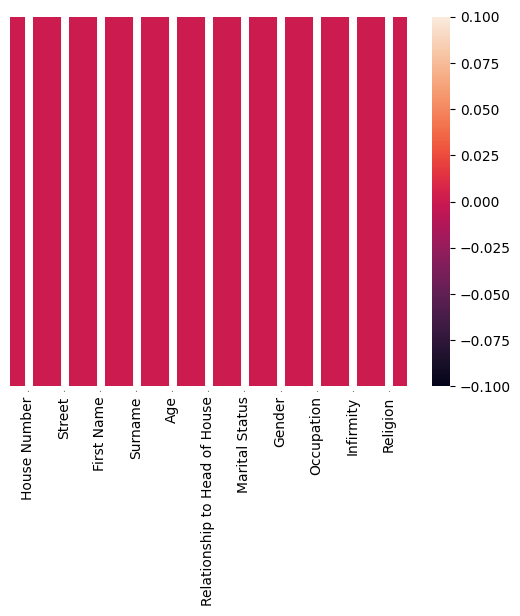

In [86]:
#heatmap showing the distributions and interactions after cleaning.
sns.heatmap(df_census10.isnull(), yticklabels = False, annot = True)

In [87]:
#Quick profile report on the data analysis after cleaning
pp.ProfileReport(df_census10)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
#dataset information at glance
df_census10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7260 non-null   int64 
 1   Street                         7260 non-null   object
 2   First Name                     7260 non-null   object
 3   Surname                        7260 non-null   object
 4   Age                            7260 non-null   int32 
 5   Relationship to Head of House  7260 non-null   object
 6   Marital Status                 7260 non-null   object
 7   Gender                         7260 non-null   object
 8   Occupation                     7260 non-null   object
 9   Infirmity                      7260 non-null   object
 10  Religion                       7260 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 595.7+ KB


### DATA ANALYSIS AND VISUALIZATION

##### Having cleaned the data we are proceeding to data analysis towards getting some useful information.

In [89]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
import sweetviz as sv

my_report = sv.analyze(df_census10)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\711994\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will 

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [91]:
#The code used to create the age range and bins in this cell was gotten from 
#(https://dfrieds.com/data-analysis/bin-values-python-pandas.ahtml) and adapted to fit this particular exercise

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, 105, 110]

order_class = ['95+', '90-95', '85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
         '65-69', '70-74', '75-79', '80-84', '85-89', '90-95','96-100', '100-105','106-110', ]


df_census10['Age Range'] = pd.cut(df_census10.Age, bins, labels = labels, include_lowest = True, ordered= False)

<AxesSubplot: xlabel='Age', ylabel='Relationship to Head of House'>

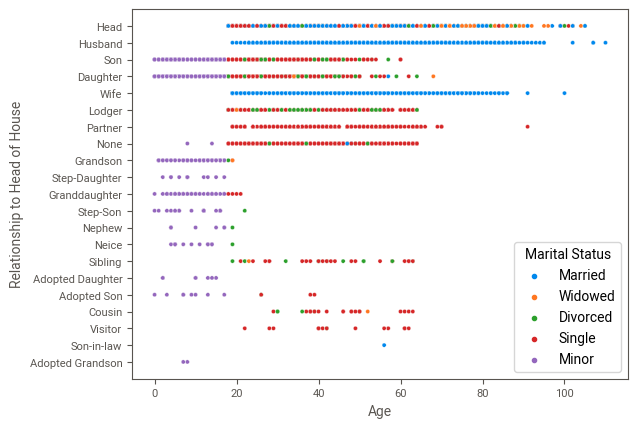

In [92]:
sns.scatterplot(data  = df_census10, x ='Age', y = 'Relationship to Head of House',hue ='Marital Status' )

In [93]:
#this will group the data by age and gender
grouped_data = df_census10.groupby(['Age Range', 'Gender']).size().reset_index(name='Population')

In [94]:
#This will create two differnt tables of male and female population, in order to perform an outer join later
female_table = grouped_data [grouped_data['Gender'] == 'Female']
male_table = grouped_data[grouped_data['Gender'] == 'Male']
female_table.columns = ['Age Range', 'Gender', 'Female Population']
male_table.columns = ['Age Range', 'Gender', 'Male Population']

In [95]:
Pyramid_table = pd.merge(female_table, male_table, on='Age Range', how='outer')
Pyramid_table

Age Range Gender_x  Female Population Gender_y  Male Population
0        0-4   Female                247     Male              235
1        5-9   Female                232     Male              223
2      10-14   Female                224     Male              256
3      15-19   Female                259     Male              262
4      20-24   Female                237     Male              220
5      25-29   Female                276     Male              235
6      30-34   Female                297     Male              216
7      35-39   Female                377     Male              259
8      40-44   Female                351     Male              277
9      45-49   Female                304     Male              257
10     50-54   Female                247     Male              231
11     55-59   Female                210     Male              176
12     60-64   Female                161     Male              157
13     65-69   Female                127     Male              112
14     70-74   Female                122     Male               94
15     75-79   Female                 80     Male               79
16     80-84   Female                 64     Male               63
17     85-89   Female                 30     Male               32
18     90-95   Female                  3     Male                9
19    96-100   Female                  7     Male                1
20   100-105   Female                  3     Male                5
21   106-110   Female                  0     Male                3

In [96]:
pyramid_table =  Pyramid_table.drop(['Gender_x', 'Gender_y' ],axis = 1)

In [97]:
pyramid_table['Total Population'] = pyramid_table['Male Population'] + pyramid_table['Female Population']

In [98]:
#This is required to create a similar plot for the age pyramid
pyramid_table['Male Population'] = - (pyramid_table['Male Population'])

In [99]:
pyramid_table

Age Range  Female Population  Male Population  Total Population
0        0-4                247             -235               482
1        5-9                232             -223               455
2      10-14                224             -256               480
3      15-19                259             -262               521
4      20-24                237             -220               457
5      25-29                276             -235               511
6      30-34                297             -216               513
7      35-39                377             -259               636
8      40-44                351             -277               628
9      45-49                304             -257               561
10     50-54                247             -231               478
11     55-59                210             -176               386
12     60-64                161             -157               318
13     65-69                127             -112               239
14     70-74                122              -94               216
15     75-79                 80              -79               159
16     80-84                 64              -63               127
17     85-89                 30              -32                62
18     90-95                  3               -9                12
19    96-100                  7               -1                 8
20   100-105                  3               -5                 8
21   106-110                  0               -3                 3

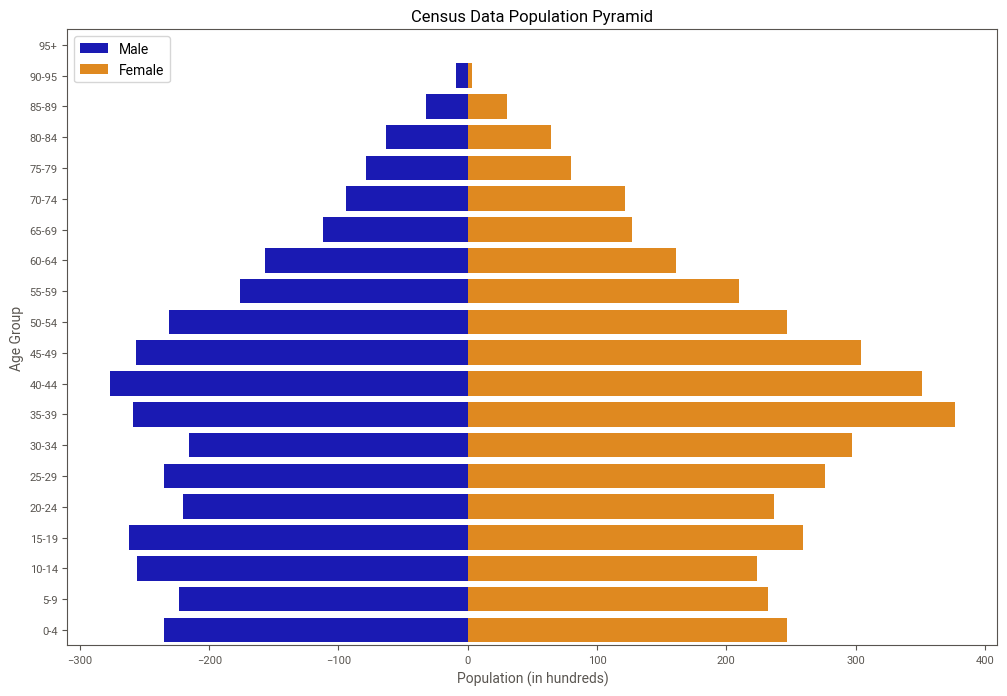

In [100]:
plt.figure(figsize=(12,8))
age_pyramid = sns.barplot(x='Male Population', y='Age Range', data=pyramid_table, color=('mediumblue'), label='Male', order= order_class )
age_pyramid = sns.barplot(x='Female Population', y='Age Range', data=pyramid_table,  color=('darkorange'), label='Female', order= order_class )
age_pyramid.set_title('Census Data Population Pyramid')
age_pyramid.set_xlabel('Population (in hundreds)')
age_pyramid.set_ylabel('Age Group')
age_pyramid.legend()

### AGE

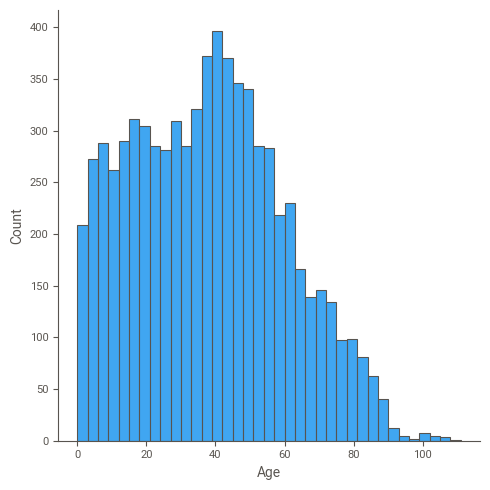

In [101]:
sns.displot(df_census10, x = 'Age', binwidth = 3)

In [102]:
df_census10.groupby('Street')['Age'].describe()

count       mean        std   min    25%   50%    75%    max
Street                                                                        
Acorn Park        336.0  44.113095  22.866759   0.0  27.00  43.0  61.00  104.0
Ali Gardens        92.0  33.184783  19.170679   1.0  18.75  33.5  48.25   76.0
Ali Light         160.0  36.156250  21.130189   0.0  19.00  39.0  50.00   95.0
Andrews Junction  123.0  30.178862  18.676290   0.0  16.00  30.0  42.00   88.0
Ashwalk Street     19.0  37.631579  23.288554   0.0  25.00  29.0  52.00   76.0
...                 ...        ...        ...   ...    ...   ...    ...    ...
Wilson Falls       20.0  48.000000  22.618111  12.0  30.75  49.5  64.75   89.0
Winter Lane        21.0  42.666667  24.838143   4.0  26.00  36.0  62.00   79.0
Wong Haven         57.0  37.982456  19.953062   1.0  20.00  40.0  54.00   80.0
Woods Windmill      5.0  32.800000  21.844908  13.0  17.00  21.0  55.00   58.0
Zebra Street       81.0  33.962963  21.319853   1.0  14.00  37.0  52.00   76.0

[105 rows x 8 columns]

<AxesSubplot: xlabel='Marital Status', ylabel='Age'>

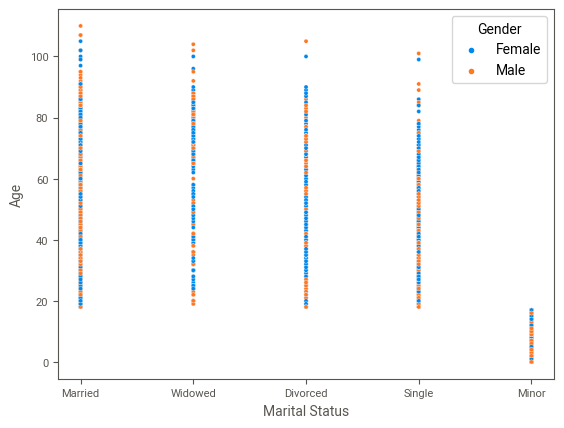

In [103]:
sns.scatterplot(data=df_census10, x='Marital Status', y='Age', hue='Gender')

Crude Birth Rate per 1000

The birth rate was calculated by dividing the number of children born annually by the total population and multiplying the result by 1000.

In [104]:
age_0 = sum(df_census10['Age'] == 0)

i = 1000/ len(df_census10) #this will be used as the multiplication constant when there is
                  #need to express any number per thousand of the population

Crude_birth_rate = age_0 * i
Crude_birth_rate

6.887052341597796

The birth rate is approximately 7 in a thousand population which is quite low

Progressive Birth Rate

This will take into account the number of children delivered annually by the number of population within the age range of 5.

In [105]:
age_5 = sum(df_census10['Age'] == 4)
pop_35_39 = 636
progres_birt = age_5 * i
progres_birt

11.84573002754821

Crude Death Rate

In [106]:
#To calculate the death rate, difference in age range above 50 is considered by taking the sum and dividing it by 5.

#To do this, we initiate a new column - Age difference table.

In [107]:
pyramid_table['Male Population'] = - (pyramid_table['Male Population'])

In [108]:
pyramid_table= pyramid_table.sort_values('Age Range', ascending= False, ignore_index = True)
pyramid_table

Age Range  Female Population  Male Population  Total Population
0    106-110                  0                3                 3
1    100-105                  3                5                 8
2     96-100                  7                1                 8
3      90-95                  3                9                12
4      85-89                 30               32                62
5      80-84                 64               63               127
6      75-79                 80               79               159
7      70-74                122               94               216
8      65-69                127              112               239
9      60-64                161              157               318
10     55-59                210              176               386
11     50-54                247              231               478
12     45-49                304              257               561
13     40-44                351              277               628
14     35-39                377              259               636
15     30-34                297              216               513
16     25-29                276              235               511
17     20-24                237              220               457
18     15-19                259              262               521
19     10-14                224              256               480
20       5-9                232              223               455
21       0-4                247              235               482

In [109]:
#Initiating a function that will calculate the difference in the total population as the population grows in age.
#create an empty list that stores these values.  
a =0
age_diff = []
while a < len(pyramid_table) - 1:
         
    age_diff.append(pyramid_table.iat[a,3] - pyramid_table.iat[a+1,3])
    a = a +1

age_diff = pd.DataFrame(age_diff, columns= ['Age Difference']) #converts the list to a dataframe.

pyramid_table = pd.concat([pyramid_table, age_diff], axis=1)   # stacking it up as multiple dataframe.

In [110]:
Crude_death_rate_table = pyramid_table.drop(columns= ['Female Population', 'Male Population'])

In [111]:
Crude_death_rate_table

Age Range  Total Population  Age Difference
0    106-110                 3            -5.0
1    100-105                 8             0.0
2     96-100                 8            -4.0
3      90-95                12           -50.0
4      85-89                62           -65.0
5      80-84               127           -32.0
6      75-79               159           -57.0
7      70-74               216           -23.0
8      65-69               239           -79.0
9      60-64               318           -68.0
10     55-59               386           -92.0
11     50-54               478           -83.0
12     45-49               561           -67.0
13     40-44               628            -8.0
14     35-39               636           123.0
15     30-34               513             2.0
16     25-29               511            54.0
17     20-24               457           -64.0
18     15-19               521            41.0
19     10-14               480            25.0
20       5-9               455           -27.0
21       0-4               482             NaN

In [112]:
#Calculate the Crude death rate from 55 and above
Crude_death_from_50_54 = (pyramid_table.iloc[:12, 4].sum())/5
Crude_death_rate = Crude_death_from_50_54 * i
Crude_death_rate

-15.37190082644628

### MARITAL STATUS

<AxesSubplot: xlabel='Age', ylabel='Marital Status'>

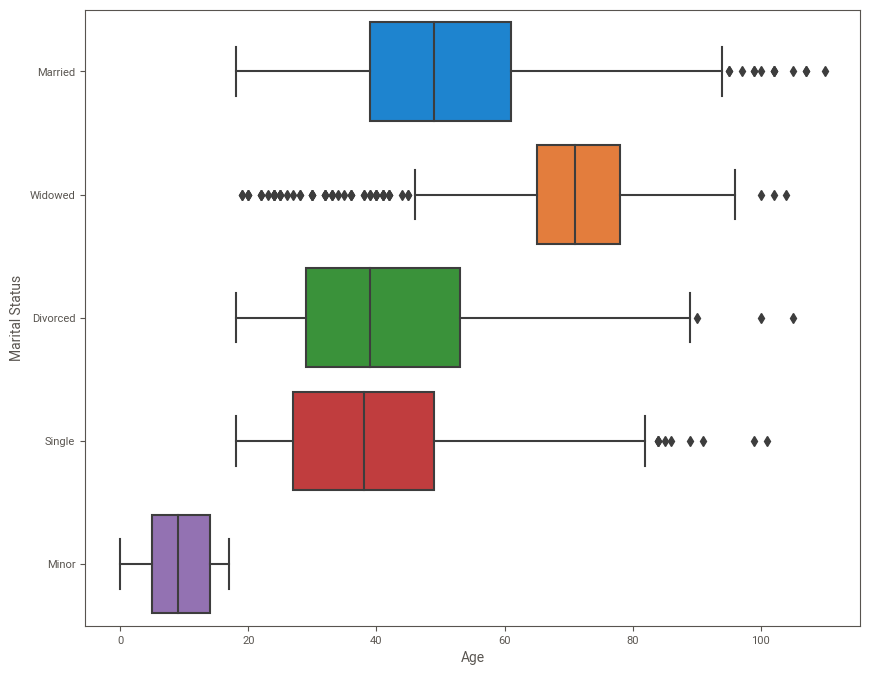

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_census10, x = 'Age', y = 'Marital Status')

<AxesSubplot: xlabel='Marital Status', ylabel='Age'>

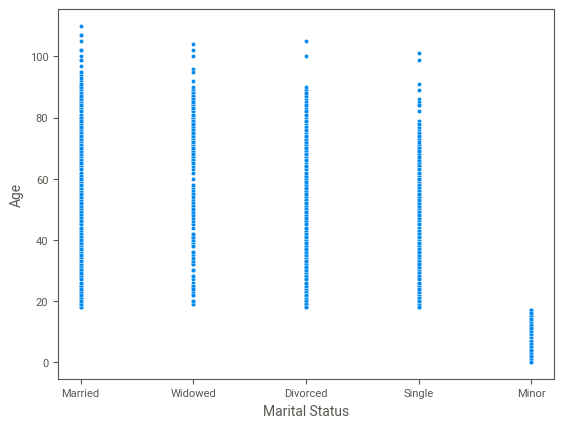

In [114]:
sns.scatterplot(data=df_census10, x='Marital Status', y='Age')

In [115]:
df_census10.groupby('Marital Status')['Age'].describe()

count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         676.0  42.498521  17.283132  18.0  29.0  39.0  53.0  105.0
Married         2142.0  50.923436  16.720236  18.0  39.0  49.0  61.0  110.0
Minor           1633.0   9.041029   5.111037   0.0   5.0   9.0  14.0   17.0
Single          2440.0  38.584016  13.939081  18.0  27.0  38.0  49.0  101.0
Widowed          369.0  66.943089  17.479787  19.0  65.0  71.0  78.0  104.0

In [116]:
#plt.figure(figsize=(10,8))
#sns.boxplot(data = df_census10, x = 'Age', y = 'Marital Status')

Immigration rate

The following Relationships to head of house: None, Adopted Son, Adopted Daughter, lodgers and visitors are considered.

In [117]:
immigrants_10 = df_census10[((df_census10['Relationship to Head of House'] == 'Lodger')| (df_census10['Relationship to Head of House']=='Visitor') | (df_census10['Relationship to Head of House']=='None')| (df_census10['Relationship to Head of House']=='Adopted Daughter')| (df_census10['Relationship to Head of House']=='Adopted Son'))]

In [118]:
immigrants_10

House Number            Street First Name  Surname  Age  \
46              18  Christmas Street      Danny    Marsh   30   
47              18  Christmas Street       Carl  Roberts   39   
48              18  Christmas Street      Lynne    Begum   28   
51              19  Christmas Street       June   Hughes   44   
52              19  Christmas Street     Nicola  Daniels   37   
...            ...               ...        ...      ...  ...   
7195             1      Atholl Lodge     Martin    Walsh   38   
7196             1      Atholl Lodge     Alison    Poole   27   
7197             1      Atholl Lodge      Katie    Smith   49   
7199             1      Atholl Lodge  Christian   Taylor   64   
7245             1     Marsden House    Bradley    Smith   60   

     Relationship to Head of House Marital Status  Gender  \
46                          Lodger         Single    Male   
47                          Lodger       Divorced    Male   
48                          Lodger         Single  Female   
51                          Lodger       Divorced  Female   
52                          Lodger         Single  Female   
...                            ...            ...     ...   
7195                        Lodger       Divorced    Male   
7196                        Lodger         Single  Female   
7197                        Lodger         Single  Female   
7199                        Lodger       Divorced    Male   
7245                        Lodger         Single    Male   

                             Occupation Infirmity   Religion Age Range  
46                                Actor      None  Methodist     25-29  
47                          Optometrist      None       None     35-39  
48                   Production manager      None   Catholic     25-29  
51                 Public house manager      None       None     40-44  
52                     Catering manager      None  Methodist     35-39  
...                                 ...       ...        ...       ...  
7195                       TEFL teacher      None       None     35-39  
7196           Computer games developer      None       None     25-29  
7197  Research officer, political party      None       None     45-49  
7199            Chartered loss adjuster      None  Christian     60-64  
7245                  Financial planner      None  Methodist     55-59  

[685 rows x 12 columns]

In [119]:
#sorting out the students from this entry
immigrants_10 = len(immigrants_10[  (immigrants_10['Occupation'] != 'University Student') &  (immigrants_10['Occupation'] != 'Student')  ])

In [120]:
immigrant_rate = immigrants_10*i
immigrant_rate

79.20110192837465

### GENDER

<AxesSubplot: xlabel='Age', ylabel='Gender'>

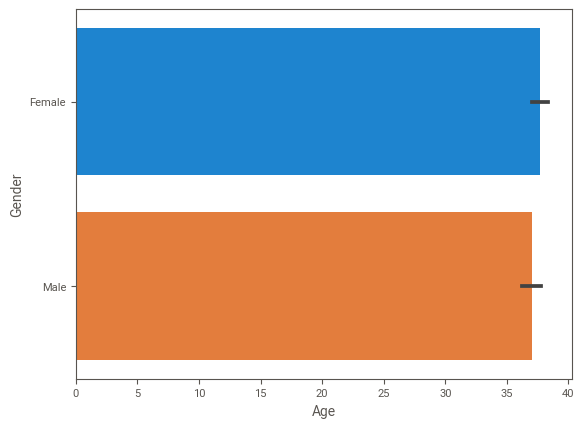

In [121]:
sns.barplot(df_census10, x = 'Age', y = 'Gender')

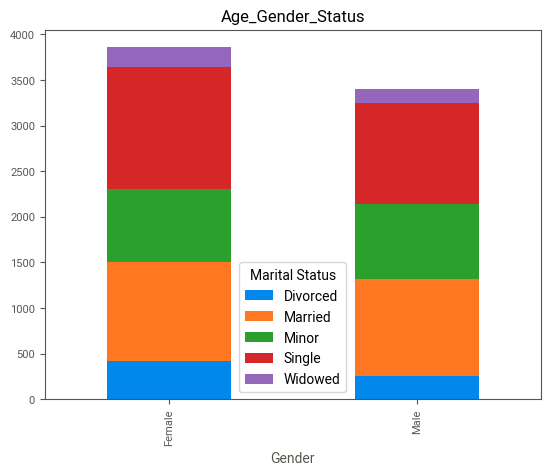

In [122]:
df_census10.groupby(['Gender','Marital Status'])['Age'].size().unstack().plot(kind='bar',stacked=True, title = "Age_Gender_Status")
plt.show()

Emmigration Rate

Differeence between the number of male and female divorced in the population is considered

In [123]:
divorce_male = df_census10[(df_census10['Marital Status'] == 'Divorced') & (df_census10['Gender'] == 'Male') & (df_census10 ['Occupation'] != 'Student')& (df_census10 ['Occupation'] != 'University Student')]
divorce_female = df_census10[(df_census10['Marital Status'] == 'Divorced') & (df_census10['Gender'] == 'Female') & (df_census10 ['Occupation'] != 'Student')& (df_census10 ['Occupation'] != 'University Student')]

In [124]:
emmigration_rate = (len(divorce_female) - len(divorce_male)) * i
emmigration_rate

23.69146005509642

Occupancy Rate

This is the average number of people living in a house in the town at the time of this exercise.

In [125]:
#group the data by street and house number
occupancy = df_census10.groupby(['Street', 'House Number']).size().reset_index(name='Number of Occupants')

In [126]:
occupancy

Street  House Number  Number of Occupants
0       Acorn Park             1                    3
1       Acorn Park             2                    1
2       Acorn Park             3                    2
3       Acorn Park             4                    3
4       Acorn Park             5                    1
...            ...           ...                  ...
2816  Zebra Street            25                    4
2817  Zebra Street            26                    2
2818  Zebra Street            27                    4
2819  Zebra Street            28                    2
2820  Zebra Street            29                    1

[2821 rows x 3 columns]

In [127]:
occupancy.median()

C:\Users\711994\AppData\Local\Temp\ipykernel_5528\2403462434.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  occupancy.median()


House Number           19.0
Number of Occupants     2.0
dtype: float64

In [128]:
#The count of the number of occupants in a house
occupancy['Number of Occupants'].value_counts()

1     846
2     827
3     446
4     347
5     267
6      47
10      9
7       8
8       7
12      6
9       4
11      3
21      1
15      1
18      1
20      1
Name: Number of Occupants, dtype: int64

In [129]:
occupancy.groupby('Number of Occupants')['House Number'].describe()

count       mean        std   min    25%   50%    75%  \
Number of Occupants                                                          
1                    846.0  43.955083  49.405870   1.0  10.00  24.0  54.00   
2                    827.0  38.307134  44.928892   1.0   9.00  22.0  44.00   
3                    446.0  29.831839  38.560980   1.0   8.00  17.0  31.75   
4                    347.0  27.881844  35.722200   1.0   7.00  16.0  33.50   
5                    267.0  25.411985  32.624008   1.0   8.00  16.0  28.00   
6                     47.0  20.787234  24.668177   2.0   6.00  17.0  26.50   
7                      8.0  13.750000  13.231456   3.0   3.75  11.5  16.00   
8                      7.0  10.000000  10.000000   1.0   3.00   7.0  13.50   
9                      4.0  17.000000  10.832051   9.0  12.00  13.0  18.00   
10                     9.0  11.333333  10.074721   1.0   4.00   9.0  12.00   
11                     3.0   1.333333   0.577350   1.0   1.00   1.0   1.50   
12                     6.0   8.666667  12.176480   1.0   1.75   5.0   6.75   
15                     1.0   7.000000        NaN   7.0   7.00   7.0   7.00   
18                     1.0  12.000000        NaN  12.0  12.00  12.0  12.00   
20                     1.0   1.000000        NaN   1.0   1.00   1.0   1.00   
21                     1.0   1.000000        NaN   1.0   1.00   1.0   1.00   

                       max  
Number of Occupants         
1                    220.0  
2                    221.0  
3                    203.0  
4                    191.0  
5                    188.0  
6                    163.0  
7                     43.0  
8                     29.0  
9                     33.0  
10                    31.0  
11                     2.0  
12                    33.0  
15                     7.0  
18                    12.0  
20                     1.0  
21                     1.0

<AxesSubplot: xlabel='Number of Occupants', ylabel='House Number'>

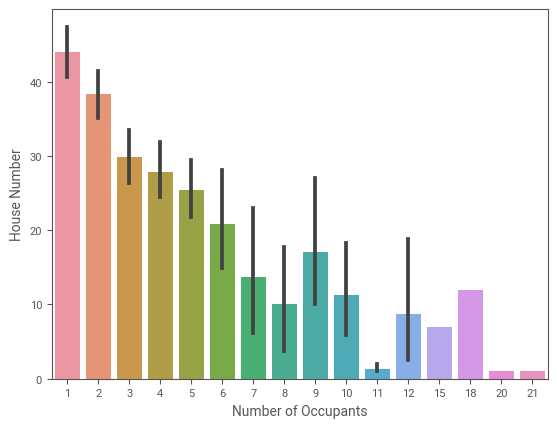

In [130]:
sns.barplot(occupancy, x = 'Number of Occupants', y = 'House Number')

### Religion

In [131]:
df_census10['Religion'].value_counts()

None         4181
Christian    1691
Catholic      752
Methodist     486
Muslim         84
Sikh           41
Jewish         19
Pagan           3
Quaker          2
Atheist         1
Name: Religion, dtype: int64

Text(0.5, 1.0, 'Religion Distrbution By Age')

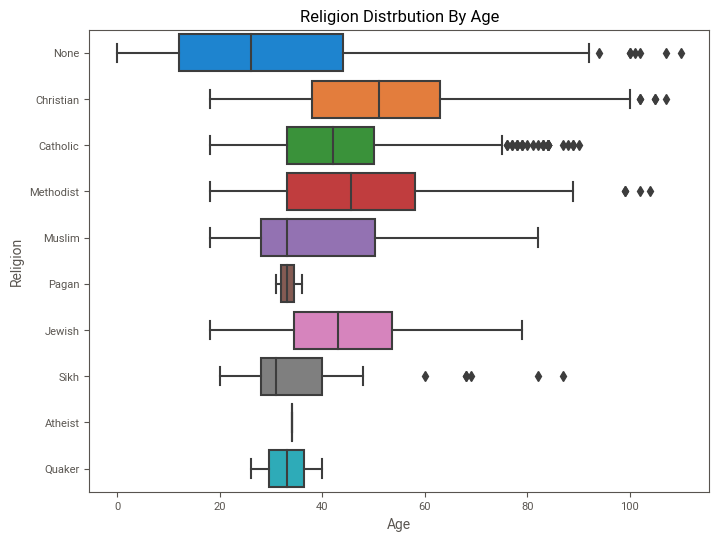

In [132]:
plt.figure(figsize=(8,6))
religion_plot = sns.boxplot(y ='Religion', x = 'Age', data = df_census10)
religion_plot.set_title ('Religion Distrbution By Age')

<AxesSubplot: xlabel='Religion', ylabel='Marital Status'>

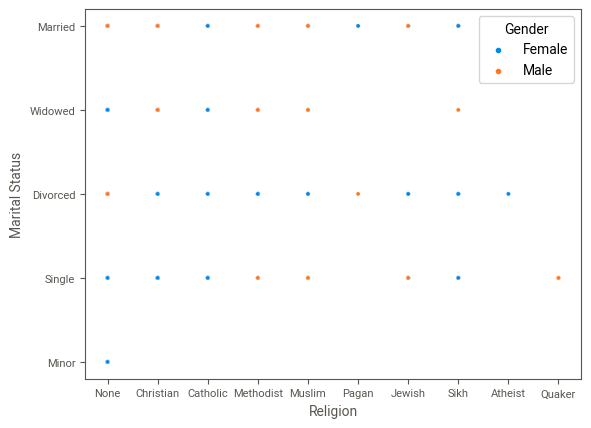

In [133]:
sns.scatterplot(data=df_census10, x='Religion', y='Marital Status', hue='Gender')

<AxesSubplot: xlabel='Age', ylabel='Religion'>

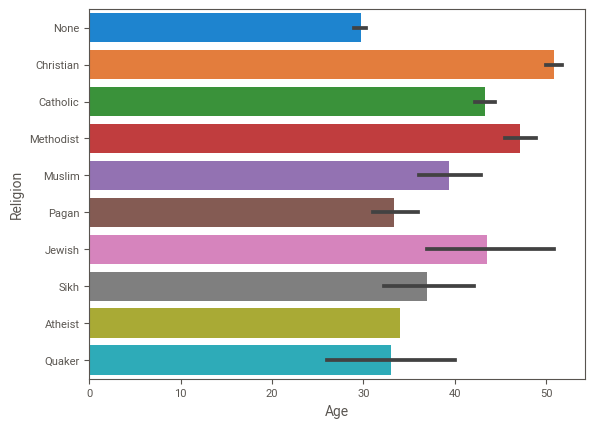

In [134]:
sns.barplot(df_census10, x = 'Age', y = 'Religion')

Text(0, 0.5, 'Religion_byAge')

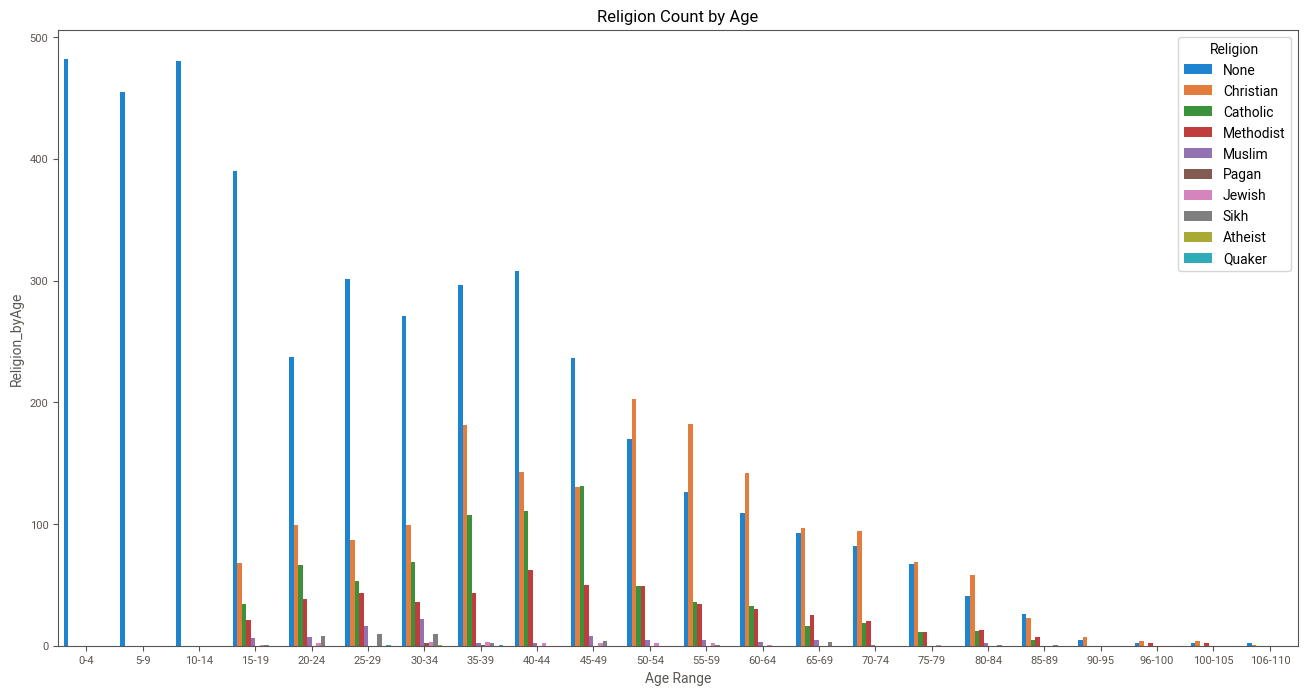

In [135]:
plt.figure(figsize= (16,8))

Religion_plot = sns.countplot(data = df_census10, x = 'Age Range', hue = 'Religion'  )
Religion_plot.set_title('Religion Count by Age')
Religion_plot.set_ylabel('Religion_byAge')

In [136]:
#To Examine the Unemployed

unemployed_population10 =df_census10 [ df_census10['Occupation'] == 'Unemployed']
#people above 65 are assumed to be retired
unemployed_population10 = unemployed_population10[unemployed_population10['Age'] < 65]

In [137]:
unemployed_population10

House Number            Street First Name         Surname  Age  \
4                2  Christmas Street      Paige          Davies   39   
5                2  Christmas Street    Patrick          Davies   35   
6                2  Christmas Street      Kelly          Davies   29   
20               8  Christmas Street        Kim         Hawkins   39   
34              13  Christmas Street      Leigh           Mason   28   
...            ...               ...        ...             ...  ...   
7159             1        Bank Ranch      David  Nixon-Anderson   42   
7169             1    Woods Windmill     Janice          Wright   55   
7182             1      Williams Inn       Lisa          Warner   27   
7183             1      Williams Inn     Callum          Warner   27   
7185             1      Williams Inn       Neil          Warner   23   

     Relationship to Head of House Marital Status  Gender  Occupation  \
4                         Daughter        Widowed  Female  Unemployed   
5                              Son         Single    Male  Unemployed   
6                         Daughter         Single  Female  Unemployed   
20                            Head        Widowed  Female  Unemployed   
34                            Head         Single    Male  Unemployed   
...                            ...            ...     ...         ...   
7159                           Son       Divorced    Male  Unemployed   
7169                          Head        Married  Female  Unemployed   
7182                      Daughter         Single  Female  Unemployed   
7183                           Son       Divorced    Male  Unemployed   
7185                           Son         Single    Male  Unemployed   

     Infirmity   Religion Age Range  
4         None  Christian     35-39  
5         None  Christian     30-34  
6         None  Christian     25-29  
20        None  Christian     35-39  
34        None       None     25-29  
...        ...        ...       ...  
7159      None  Christian     40-44  
7169      None  Christian     50-54  
7182      None  Christian     25-29  
7183      None  Christian     25-29  
7185      None       None     20-24  

[452 rows x 12 columns]

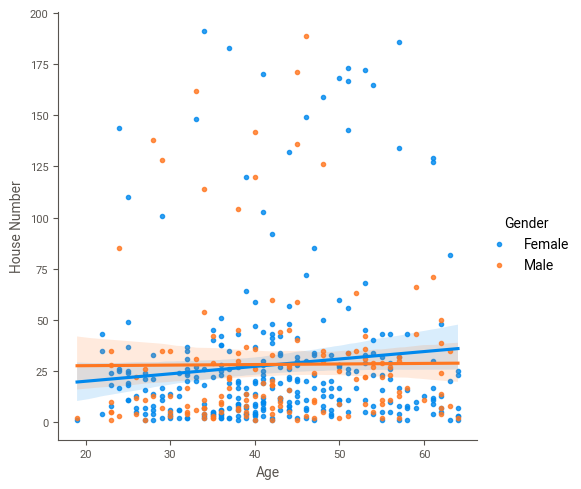

In [138]:
sns.lmplot(data=unemployed_population10, x='Age', y='House Number', hue='Gender')

Text(0, 0.5, 'Unemployed_byAge')

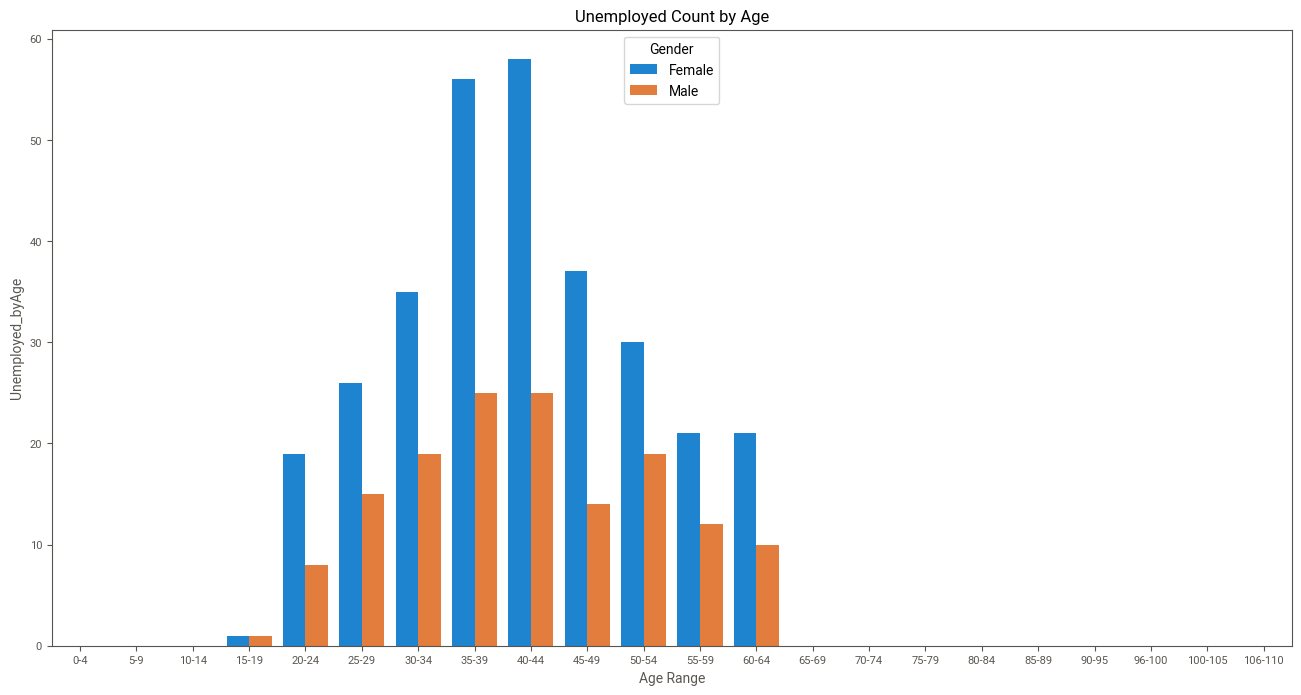

In [139]:
plt.figure(figsize= (16,8))

unemployment_plot = sns.countplot(data = unemployed_population10, x = 'Age Range', hue = 'Gender'  )
unemployment_plot.set_title('Unemployed Count by Age')
unemployment_plot.set_ylabel('Unemployed_byAge')

These plots show that there are a lot unemployed females in their active working-age. 

Text(0, 0.5, 'Unemployed_byAge')

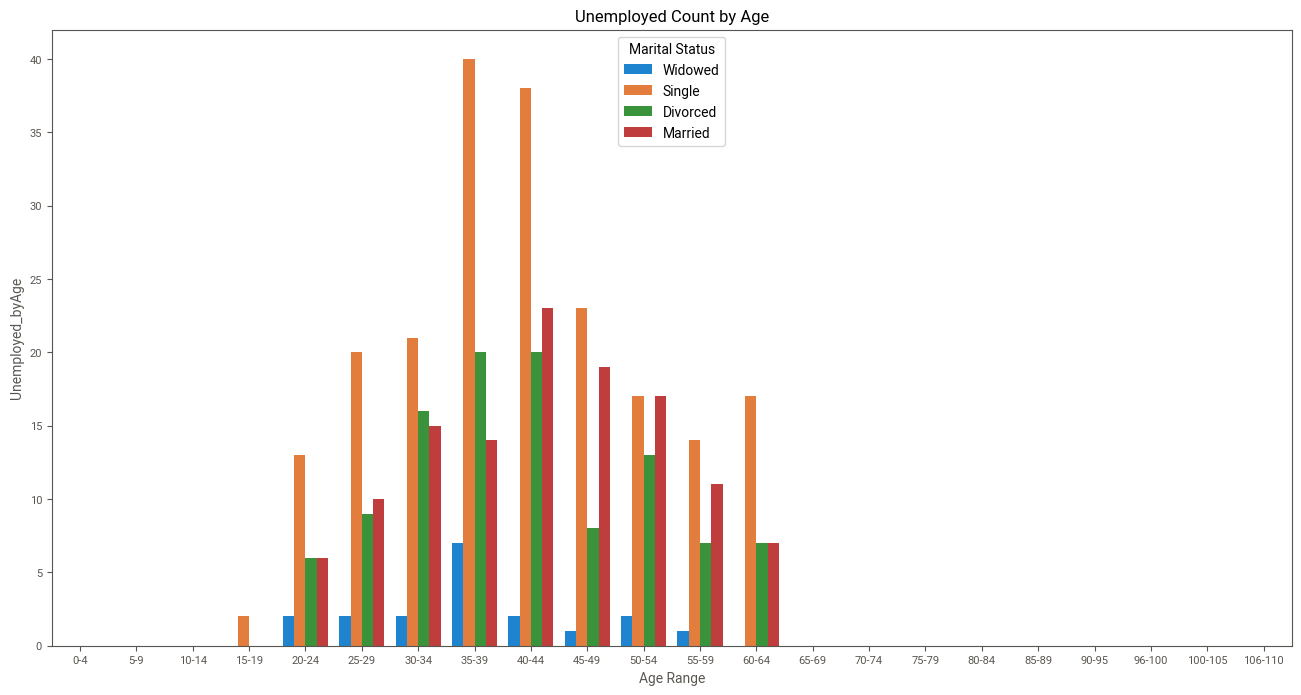

In [140]:
plt.figure(figsize= (16,8))

unemployment_plot = sns.countplot(data = unemployed_population10, x = 'Age Range', hue = 'Marital Status'  )
unemployment_plot.set_title('Unemployed Count by Age')
unemployment_plot.set_ylabel('Unemployed_byAge')

In [141]:
#To Examine the Unemployed_% Retired

unemployedRetired_population10 =df_census10 [ df_census10['Occupation'] == 'Unemployed']
#people above 65 are assumed to be retired
unemployedRetired_population10 = unemployedRetired_population10[unemployedRetired_population10['Age'] >= 65]
unemployedRetired_population10

House Number             Street First Name     Surname  Age  \
100             36   Christmas Street     Claire      Butler   86   
150              4      Mistry Avenue    Bernard      Miller   74   
220             10         Truro Lane     Lesley   Whitehead   75   
230             17         Truro Lane  Alexandra       Lewis   66   
336             18     Railway Avenue     Amelia     Osborne   71   
593             19      Macerush Road      Jodie        Dunn   66   
632             32      Macerush Road     Angela    Sullivan   67   
634             33      Macerush Road     Duncan     Elliott   78   
720             67      Macerush Road    William      Barton   65   
806            101      Macerush Road       Anna       Smith   67   
1016            19         Ripon Lane        Joe        Ward   68   
1264            16         Wong Haven      Colin     Freeman   67   
1427             7     Clarke Meadows   Kathleen    Donnelly   73   
1491            40    Lucas Underpass    Gregory      Thomas   82   
1530            14         Read Drive    Valerie       Evans   86   
1601            10         Leeds Lane     Angela        Chan   71   
1934            10       Zebra Street       Leah      Porter   67   
2137             8  Lowlandadd Street     Lauren     Stevens   72   
2752            13       Berry Avenue       Mary      Palmer   73   
2806            14       Smith Summit     Louise       Jones   70   
2949            19       Temple River      Jenna     Johnson   73   
3028            41       Temple River       Joan      Cooper   79   
3114             4    Severnvane Lane     Kieran       Scott   66   
3287            35    Landings Avenue      Aimee       Cross   66   
3342            54    Landings Avenue      Donna     Stanley   71   
3473             6       Ellis Branch      Janet     Roberts   67   
3505             9       Boyle Street      Keith  O'Sullivan   78   
3560            38          King Road      Peter     Stewart   83   
3664             1     Clayton Groves    Chelsea       Jones   70   
3924            40   Holland Motorway     Sylvia     Johnson   70   
4070             6     Burgess Street     Amanda        Hill   69   
4744             4    George Villages       Lisa     Roberts   71   
4838             4      Holmes Points     Sophie       Smith   82   
5229             5          Gray Fort  Francesca        Lane   68   
5426            55     Brasslure Road      Jemma      Winter   67   
5556            17    Embankment Road    Jessica     Jenkins   78   
5600            38    Embankment Road      Marie       Short   65   
5619            46    Embankment Road      Rosie         Lee   66   
5720            23     London Freeway     Victor      Powell   66   
6118           148  Atkinson Motorway       Beth    Matthews   78   
6226           187  Atkinson Motorway     Leslie      Walker   79   
6353            72        Ball Tunnel     Jeremy      Butler   67   

     Relationship to Head of House Marital Status  Gender  Occupation  \
100                           Head        Widowed  Female  Unemployed   
150                           Head       Divorced    Male  Unemployed   
220                           Wife        Married  Female  Unemployed   
230                           Head        Married  Female  Unemployed   
336                           Head        Widowed  Female  Unemployed   
593                           Head        Widowed  Female  Unemployed   
632                           Head         Single  Female  Unemployed   
634                           Head        Widowed    Male  Unemployed   
720                        Husband        Married    Male  Unemployed   
806                           Head        Married  Female  Unemployed   
1016                          Head        Widowed    Male  Unemployed   
1264                          Head        Widowed    Male  Unemployed   
1427                          Head        Widowed  Female  Unemployed   
1491            

Text(0, 0.5, 'UnemployedRetired_byAge')

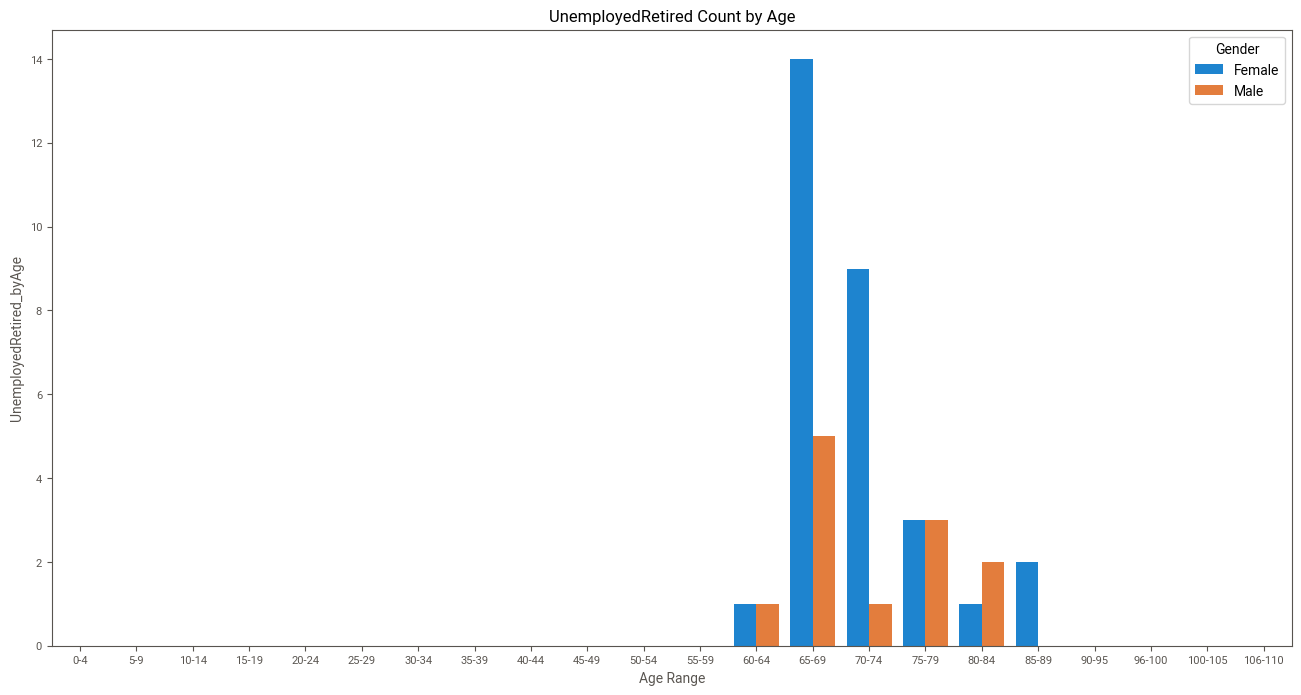

In [142]:
plt.figure(figsize= (16,8))

unemployedRetired_population10_plot = sns.countplot(data = unemployedRetired_population10, x = 'Age Range', hue = 'Gender'  )
unemployedRetired_population10_plot.set_title('UnemployedRetired Count by Age')
unemployedRetired_population10_plot.set_ylabel('UnemployedRetired_byAge')

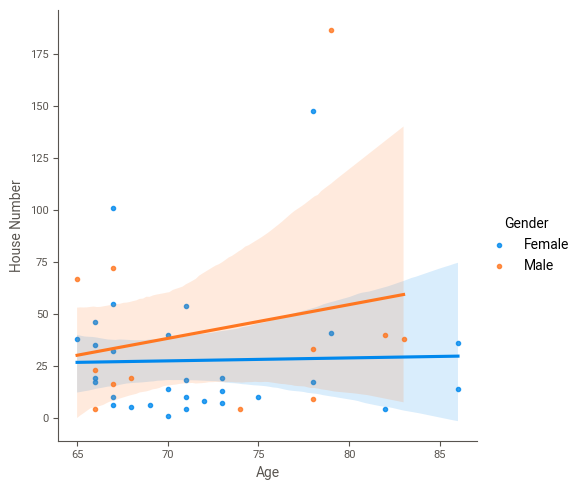

In [143]:
sns.lmplot(data=unemployedRetired_population10, x='Age', y='House Number', hue='Gender')

This shows that the majority of the unemployed retired people are residing within house numbers 0-75 and are fall mostly within 65-75 age bands.

In [144]:
#To Examine the Employed

Employed_population10 = df_census10 [( df_census10['Occupation'] != 'Unemployed') | ( df_census10['Occupation'] != 'Child') | ( df_census10['Occupation'] != 'Student') |( df_census10['Occupation'] != 'University Student')]
#people above 65 are assumed to be retired
Employed_population10 = Employed_population10[Employed_population10['Age'] < 65]

In [145]:
Employed_population10

House Number            Street First Name  Surname  Age  \
0                1  Christmas Street      Kerry    Jones   34   
1                1  Christmas Street      Allan  Collins   36   
3                2  Christmas Street   Jonathan   Davies   41   
4                2  Christmas Street      Paige   Davies   39   
5                2  Christmas Street    Patrick   Davies   35   
...            ...               ...        ...      ...  ...   
7255             1      Monk Rectory    Marilyn  Wallace   40   
7256             1      Monk Rectory     Edward  Wallace   37   
7257             1      Monk Rectory       Jack  Wallace   16   
7258             1      Monk Rectory      Kevin  Wallace   14   
7259             1      Monk Rectory     Claire  Wallace   14   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married  Female   
1                          Husband        Married    Male   
3                              Son       Divorced    Male   
4                         Daughter        Widowed  Female   
5                              Son         Single    Male   
...                            ...            ...     ...   
7255                          Head        Married  Female   
7256                       Husband        Married    Male   
7257                           Son          Minor    Male   
7258                           Son          Minor    Male   
7259                      Daughter          Minor  Female   

                                    Occupation Infirmity   Religion Age Range  
0                          Mechanical engineer      None       None     30-34  
1                                Ranger/warden      None       None     35-39  
3                            Ceramics designer      None  Christian     40-44  
4                                   Unemployed      None  Christian     35-39  
5                                   Unemployed      None  Christian     30-34  
...                                        ...       ...        ...       ...  
7255                     Clinical psychologist      None       None     35-39  
7256  Geographical information systems officer      None       None     35-39  
7257                                   Student      None       None     15-19  
7258                                   Student      None       None     10-14  
7259                                   Student      None       None     10-14  

[6375 rows x 12 columns]

In [146]:
#excluding child, student and university student all less than 65.
ratio_Employ = len(Employed_population10)/len(df_census10)
ratio_Employ

0.878099173553719

This shows roughly 87% of the working-age population are employed.

In [147]:
#all less than 65
ratio_Unemploy = len(unemployed_population10)/len(df_census10)
ratio_Unemploy

0.06225895316804408

This shows roughly 6% of the working-age population are unemployed.

In [148]:
Employed_Street = Employed_population10.groupby('Street')['House Number'].describe()
Employed_Street

count        mean        std  min    25%    50%     75%  \
Street                                                                      
Acorn Park        263.0  112.977186  65.093645  1.0  56.00  117.0  174.50   
Ali Gardens        86.0   13.279070   7.818005  1.0   6.00   13.0   20.00   
Ali Light         148.0   27.851351  15.870807  1.0  13.75   28.5   42.00   
Andrews Junction  119.0   17.857143  10.219030  1.0   9.00   18.0   27.00   
Ashwalk Street     15.0    3.733333   1.980861  1.0   2.50    4.0    4.00   
...                 ...         ...        ...  ...    ...    ...     ...   
Wilson Falls       15.0    3.933333   2.153624  1.0   2.50    3.0    6.00   
Winter Lane        16.0    7.562500   3.501785  1.0   4.75    7.5    9.25   
Wong Haven         52.0    7.961538   4.401254  1.0   4.00    7.0   12.00   
Woods Windmill      5.0    1.000000   0.000000  1.0   1.00    1.0    1.00   
Zebra Street       74.0   14.418919   8.049516  1.0   8.25   14.0   21.00   

                    max  
Street                   
Acorn Park        220.0  
Ali Gardens        28.0  
Ali Light          54.0  
Andrews Junction   35.0  
Ashwalk Street      7.0  
...                 ...  
Wilson Falls        7.0  
Winter Lane        14.0  
Wong Haven         15.0  
Woods Windmill      1.0  
Zebra Street       28.0  

[104 rows x 8 columns]

Text(0, 0.5, 'Employed_byAge')

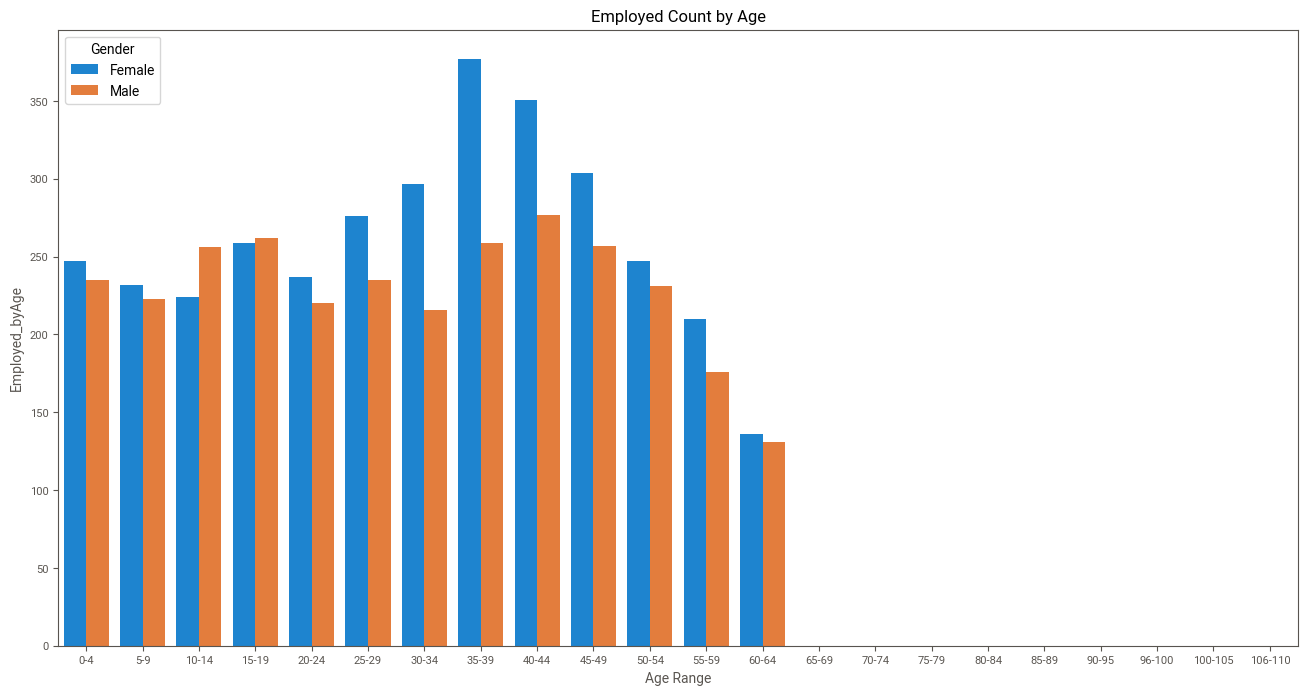

In [149]:
plt.figure(figsize= (16,8))

Employment_plot = sns.countplot(data =Employed_population10, x = 'Age Range', hue = 'Gender'  )
Employment_plot.set_title('Employed Count by Age')
Employment_plot.set_ylabel('Employed_byAge')

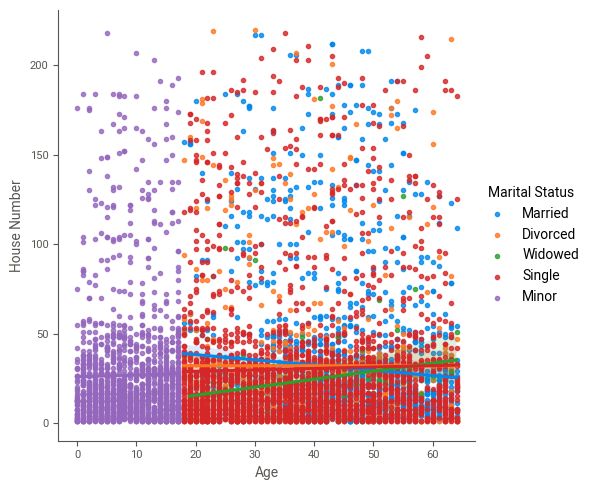

In [150]:
sns.lmplot(data=Employed_population10, x='Age', y='House Number', hue='Marital Status')

This shows that there are a lot of under 18 and single active working-age population within the town.

In [151]:
#Divorce Rate
divorce = df_census10[df_census10['Marital Status'] == 'Divorced']

In [152]:
divorce

House Number            Street First Name   Surname  Age  \
3                2  Christmas Street   Jonathan    Davies   41   
11               5  Christmas Street      Linda  Williams   29   
13               6  Christmas Street        Ann     Lewis   38   
24              10  Christmas Street     Alison  Harrison   38   
35              14  Christmas Street       Mark      Bell   31   
...            ...               ...        ...       ...  ...   
7213             1   Telegraph House  Alexandra      Shaw   41   
7222             1   Telegraph House     Adrian      Shaw   26   
7249             1     Exchange Fort     Gerard  Gardiner   39   
7250             1     Exchange Fort     Joanne  Gardiner   37   
7253             1     Exchange Fort       Gary  Gardiner   22   

     Relationship to Head of House Marital Status  Gender  \
3                              Son       Divorced    Male   
11                            Head       Divorced  Female   
13                            Head       Divorced  Female   
24                            Head       Divorced  Female   
35                            Head       Divorced    Male   
...                            ...            ...     ...   
7213                      Daughter       Divorced  Female   
7222                           Son       Divorced    Male   
7249                           Son       Divorced    Male   
7250                      Daughter       Divorced  Female   
7253                           Son       Divorced    Male   

                                   Occupation Infirmity   Religion Age Range  
3                           Ceramics designer      None  Christian     40-44  
11                          Medical secretary      None       None     25-29  
13                     Financial risk analyst      None   Catholic     35-39  
24                        Trade mark attorney      None   Catholic     35-39  
35                          Medical physicist      None  Methodist     30-34  
...                                       ...       ...        ...       ...  
7213         Higher education careers adviser      None  Christian     40-44  
7222                    Insurance underwriter      None       None     25-29  
7249  Diplomatic Services operational officer      None       None     35-39  
7250                  Clinical cytogeneticist      None       None     35-39  
7253                       University Student      None       None     20-24  

[676 rows x 12 columns]

In [153]:
#to get the total number of female divorcees
len (divorce[divorce['Gender'] == 'Female'])

422

In [154]:
#to get the total number of male divorcees
len (divorce[divorce['Gender'] == 'Male'])

254

In [155]:
#Total number or marriage 
marriage = len (df_census10[df_census10['Marital Status'] == 'Married']) / 2
marriage

1071.0

In [156]:
#Divorce ratio per population of 1000
((len (divorce[divorce['Gender'] == 'Female']))*1000)/7260

58.1267217630854

This shows that out of every thousand population there are 58 divorces

In [157]:
#marriage ratio per population of 1000
((len (df_census10[df_census10['Marital Status'] == 'Married']) / 2)*1000)/7260

147.5206611570248

This shows that out of every thousand population there are roughly 148 couples which is quite low for the town.

Text(0.5, 1.0, 'Divorce Count by Age')

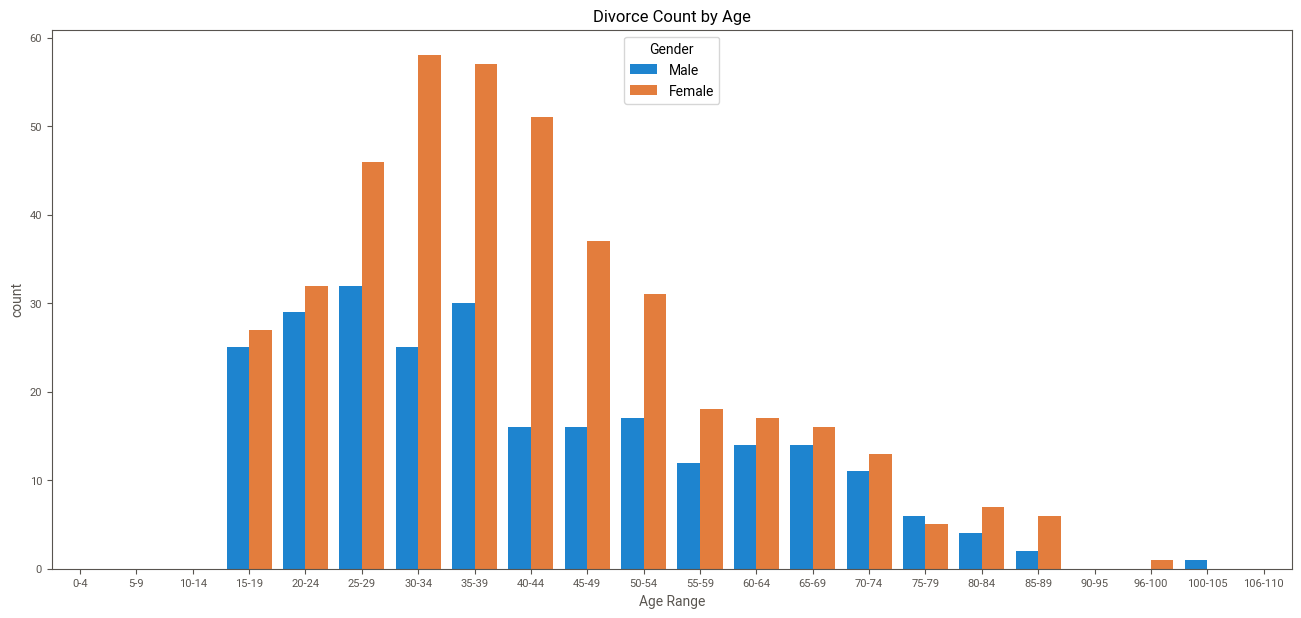

In [158]:
plt.figure(figsize= (16,7))
divorce_plot = sns.countplot(data = divorce, x = 'Age Range', hue = 'Gender' )
divorce_plot.set_title  ('Divorce Count by Age')

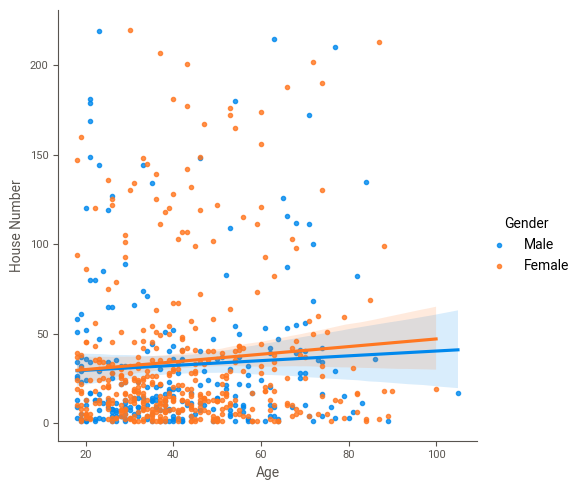

In [159]:
sns.lmplot(data=divorce, x='Age', y='House Number', hue='Gender')

It could be observed from the plot that there are high number of female divorcees residing within the town. This will definitely increase the rate of sexual promiscuity and STD spread within the population.

In [160]:
df_divorce_fem = df_census10[(df_census10['Marital Status'] == 'Divorced') & (df_census10['Gender'] == 'Female')]

In [161]:
df_divorce_fem.groupby('Religion')['Age'].describe()

count       mean        std   min   25%   50%    75%    max
Religion                                                              
Atheist      1.0  34.000000        NaN  34.0  34.0  34.0  34.00   34.0
Catholic    59.0  42.372881  14.292388  20.0  32.0  41.0  49.00   84.0
Christian  128.0  49.296875  18.811271  18.0  35.0  49.5  63.00  100.0
Jewish       3.0  50.666667  30.730007  18.0  36.5  55.0  67.00   79.0
Methodist   45.0  40.777778  14.355691  19.0  32.0  39.0  45.00   88.0
Muslim       5.0  37.200000  25.508822  19.0  24.0  30.0  31.00   82.0
None       177.0  38.649718  13.999651  18.0  28.0  37.0  46.00   89.0
Sikh         4.0  29.750000   3.593976  25.0  28.0  30.5  32.25   33.0

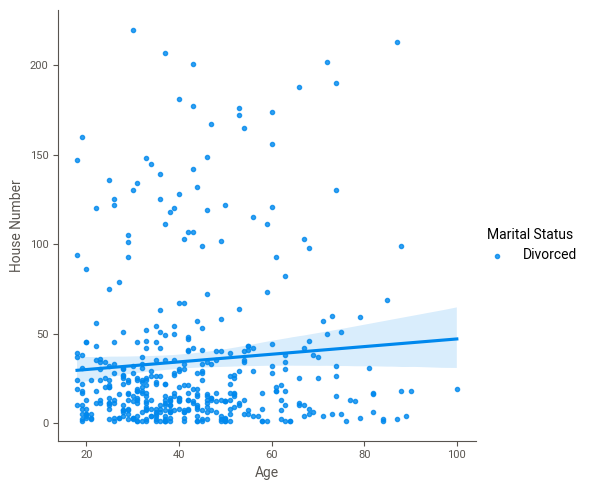

In [162]:
sns.lmplot(data=df_divorce_fem, x='Age', y='House Number', hue='Marital Status')

This shows the female divorce distribution across the population. It is obvious that there is only female Atheist. 5 female muslims, 3 female Jews, with (59+128)female christians catholics inclusive. House Numbers below 60 are quite concentrated with divorce women.

### OCCUPATION

In [163]:
df_census10['Occupation'].unique()

array(['Mechanical engineer', 'Ranger/warden', 'Retired Oncologist', ...,
       'Retired Textile designer', 'Retired Horticulturist, amenity',
       'Retired Horticulturist, commercial'], dtype=object)

In [164]:
df_divorce_fem.groupby('Occupation')['Age'].describe()

count       mean        std   min  \
Occupation                                                                
Accommodation manager                   1.0  28.000000        NaN  28.0   
Accountant, chartered certified         1.0  37.000000        NaN  37.0   
Accountant, chartered public finance    1.0  60.000000        NaN  60.0   
Accounting technician                   2.0  33.500000   0.707107  33.0   
Acupuncturist                           1.0  43.000000        NaN  43.0   
...                                     ...        ...        ...   ...   
University Student                     26.0  20.076923   1.092633  19.0   
Visual merchandiser                     2.0  36.500000  17.677670  24.0   
Warehouse manager                       2.0  44.000000   0.000000  44.0   
Water quality scientist                 1.0  35.000000        NaN  35.0   
Web designer                            1.0  47.000000        NaN  47.0   

                                        25%   50%    75%   max  
Occupation                                                      
Accommodation manager                 28.00  28.0  28.00  28.0  
Accountant, chartered certified       37.00  37.0  37.00  37.0  
Accountant, chartered public finance  60.00  60.0  60.00  60.0  
Accounting technician                 33.25  33.5  33.75  34.0  
Acupuncturist                         43.00  43.0  43.00  43.0  
...                                     ...   ...    ...   ...  
University Student                    19.00  20.0  21.00  22.0  
Visual merchandiser                   30.25  36.5  42.75  49.0  
Warehouse manager                     44.00  44.0  44.00  44.0  
Water quality scientist               35.00  35.0  35.00  35.0  
Web designer                          47.00  47.0  47.00  47.0  

[246 rows x 8 columns]

In [165]:
df_Commuter= df_census10[(df_census10['Occupation'] == 'Professor Emeritus') | (df_census10['Occupation'] == 'University Student') | (df_census10['Occupation'] == 'PhD Student') | (df_census10['Occupation'] == 'Associate Professor')| (df_census10['Occupation'] == 'Further education lecturer')| (df_census10['Occupation'] == 'Higher education lecturer')| (df_census10['Occupation'] == 'Higher education career adviser') | (df_census10['Occupation'] == 'Lecturer, further education') | (df_census10['Occupation'] == 'Solicitor') | (df_census10['Occupation'] == 'Solicitor, Scotland') | (df_census10['Occupation'] == 'Research scientist (medical)')| (df_census10['Occupation'] == 'Research scientist (maths)')| (df_census10['Occupation'] == 'Research scientist (physical science)')| (df_census10['Occupation'] == 'Barrister')| (df_census10['Occupation'] == 'Barista') | (df_census10['Occupation'] == 'Ship broker')| (df_census10['Occupation'] == 'Oceanographer')]
df_Commuter

House Number            Street First Name   Surname  Age  \
30              12  Christmas Street     Ronald     White   37   
56              20  Christmas Street       Adam     Smith   20   
65              23  Christmas Street      Diane  Mitchell   21   
68              24  Christmas Street      Reece   Clayton   20   
89              32  Christmas Street     Hannah     Jones   19   
...            ...               ...        ...       ...  ...   
7171             1    Woods Windmill      Reece    Wright   21   
7186             1      Williams Inn  Francesca    Warner   20   
7229             1   Calendar Palace     Damien     James   21   
7239             1     Marsden House       Gail     Lucas   20   
7253             1     Exchange Fort       Gary  Gardiner   22   

     Relationship to Head of House Marital Status  Gender          Occupation  \
30                         Husband        Married    Male         Ship broker   
56                             Son         Single    Male  University Student   
65                          Lodger         Single  Female  University Student   
68                             Son       Divorced    Male  University Student   
89                        Daughter         Single  Female  University Student   
...                            ...            ...     ...                 ...   
7171                           Son         Single    Male  University Student   
7186                      Daughter         Single  Female  University Student   
7229                           Son         Single    Male  University Student   
7239                      Daughter         Single  Female  University Student   
7253                           Son       Divorced    Male  University Student   

     Infirmity   Religion Age Range  
30        None       None     35-39  
56        None  Christian     15-19  
65        None       None     20-24  
68        None       None     15-19  
89        None       None     15-19  
...        ...        ...       ...  
7171      None       None     20-24  
7186      None  Christian     15-19  
7229      None       None     20-24  
7239      None  Christian     15-19  
7253      None       None     20-24  

[501 rows x 12 columns]

In [166]:
df_Commuter.groupby('Occupation')['Age'].describe()

count       mean        std   min    25%   50%  \
Occupation                                                                     
Associate Professor             2.0  30.000000   8.485281  24.0  27.00  30.0   
Barista                         4.0  31.000000   8.755950  20.0  26.00  32.5   
Barrister                       5.0  46.600000   8.961027  37.0  37.00  51.0   
Further education lecturer      7.0  45.571429  14.257830  26.0  36.00  45.0   
Higher education lecturer       7.0  31.142857   3.078342  28.0  28.50  31.0   
Lecturer, further education     5.0  45.800000  12.194261  36.0  40.00  43.0   
Oceanographer                   8.0  37.875000  10.802612  27.0  29.50  33.0   
PhD Student                    13.0  27.384615   2.631174  23.0  26.00  28.0   
Professor Emeritus              4.0  46.000000  13.140269  31.0  40.75  45.0   
Research scientist (maths)      7.0  43.142857   9.026416  29.0  39.00  40.0   
Research scientist (medical)   10.0  39.200000  12.407883  24.0  26.50  42.0   
Ship broker                    10.0  41.900000  13.486207  26.0  31.75  36.5   
Solicitor                       3.0  44.666667  16.802778  30.0  35.50  41.0   
Solicitor, Scotland            12.0  45.583333  12.464191  25.0  36.75  46.0   
University Student            404.0  20.299505   1.218916  18.0  19.00  20.0   

                                75%   max  
Occupation                                 
Associate Professor           33.00  36.0  
Barista                       37.50  39.0  
Barrister                     52.00  56.0  
Further education lecturer    56.50  63.0  
Higher education lecturer     33.00  36.0  
Lecturer, further education   43.00  67.0  
Oceanographer                 50.25  51.0  
PhD Student                   29.00  32.0  
Professor Emeritus            50.25  63.0  
Research scientist (maths)    50.00  55.0  
Research scientist (medical)  47.75  58.0  
Ship broker                   53.25  62.0  
Solicitor                     52.00  63.0  
Solicitor, Scotland           54.25  67.0  
University Student            21.00  24.0

<AxesSubplot: >

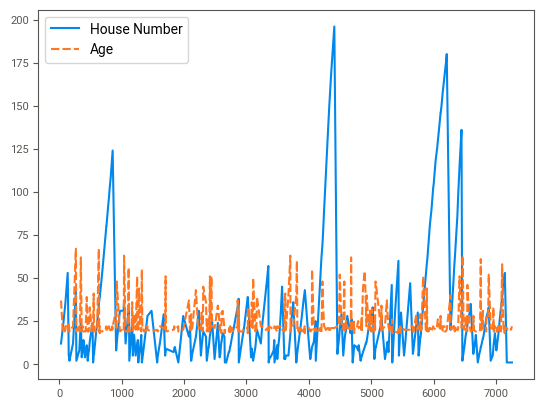

In [167]:
sns.lineplot(data=df_Commuter.drop(['Gender'], axis=1))

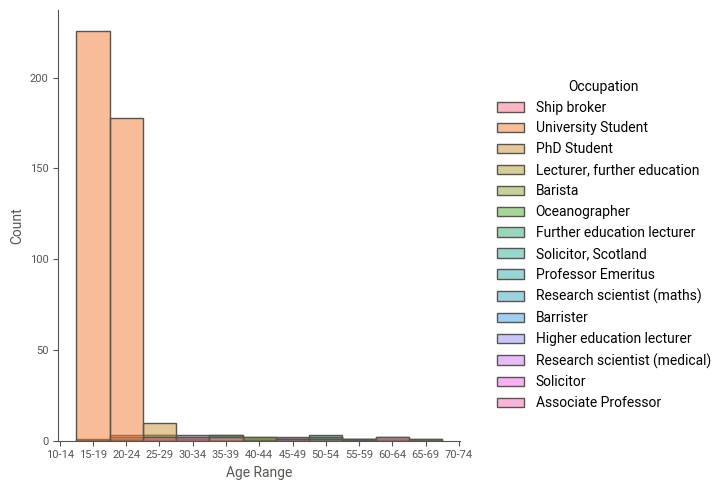

In [168]:
sns.displot(df_Commuter, x = 'Age Range', hue = 'Occupation', binwidth = 3)

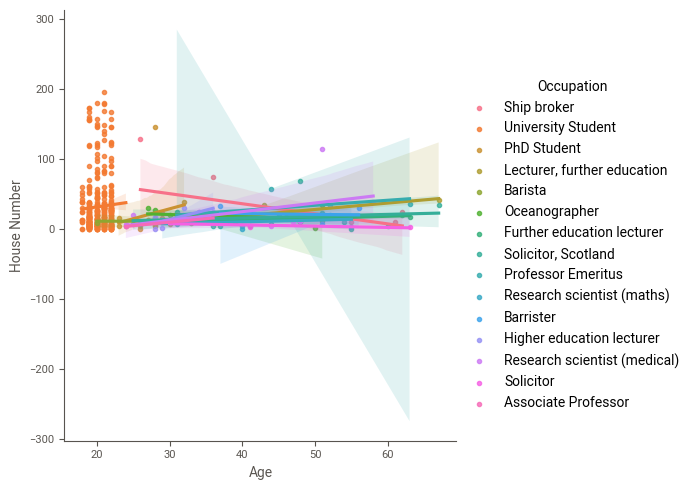

In [169]:
sns.lmplot(data=df_Commuter, x='Age', y='House Number', hue='Occupation')

It is observed that the students inluding university students are occupying house numbers across 0-190 within the age brackets of 10-25 mainly.

In [170]:
df_census10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7260 non-null   int64   
 1   Street                         7260 non-null   object  
 2   First Name                     7260 non-null   object  
 3   Surname                        7260 non-null   object  
 4   Age                            7260 non-null   int32   
 5   Relationship to Head of House  7260 non-null   object  
 6   Marital Status                 7260 non-null   object  
 7   Gender                         7260 non-null   object  
 8   Occupation                     7260 non-null   object  
 9   Infirmity                      7260 non-null   object  
 10  Religion                       7260 non-null   object  
 11  Age Range                      7260 non-null   category
dtypes: category(1), int32(1), int64(1)

### INFIRMITY

In [171]:
df_census10.groupby('Infirmity')['Gender'].describe()

count unique     top  freq
Infirmity                                     
Blind                   7      2    Male     6
Deaf                    8      2    Male     5
Disabled                5      2    Male     3
Mental Disability       3      2  Female     2
None                 7220      2  Female  3841
Physical Disability    12      2  Female     6
Unknown Infection       5      2  Female     3

<AxesSubplot: xlabel='Age', ylabel='Infirmity'>

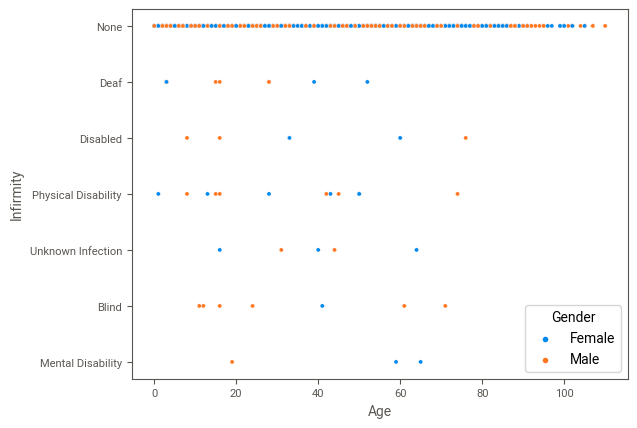

In [172]:
sns.scatterplot(data=df_census10, x='Age', y='Infirmity', hue='Gender')

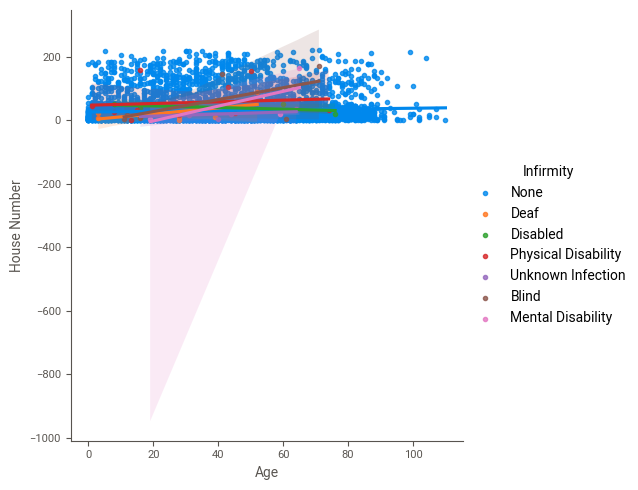

In [173]:
sns.lmplot(data=df_census10, x='Age', y='House Number', hue='Infirmity')

Infirmity shows that blue has more dominance over the rest. There is a greater population of able men and women.

<AxesSubplot: xlabel='Age', ylabel='Infirmity'>

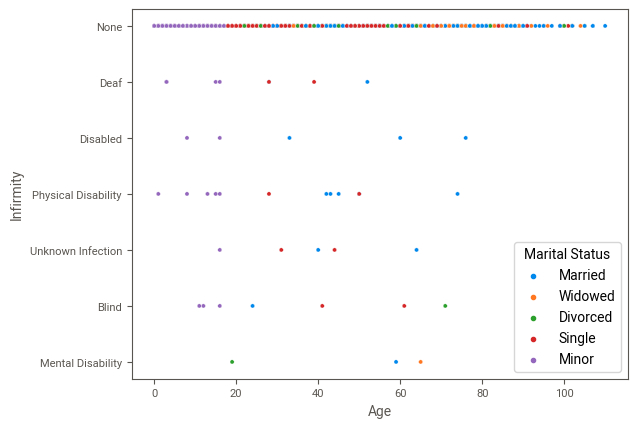

In [174]:
sns.scatterplot(data=df_census10, x='Age', y='Infirmity', hue='Marital Status')

<AxesSubplot: xlabel='Age', ylabel='Infirmity'>

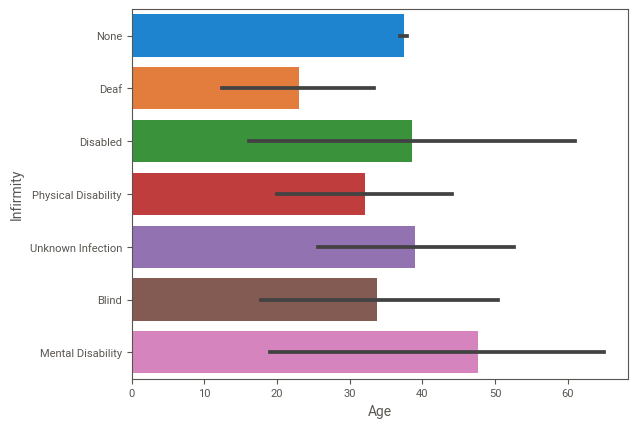

In [175]:
sns.barplot(df_census10, x = 'Age', y = 'Infirmity')